# Final Project Submission : OSEMN with King County House Sales Dataset

Please fill out:
* Student name: Emily J. Cain
* Student pace: full time
* Scheduled project review date/time: Tuesday, October 30, 2018, 1400 EST
* Instructor name: Rafael Carrasco


## Obtain

Read in from csv file

In [1]:
# disable autoscroll?

In [2]:
# To do:
# format notebook with 3 questions
# include answers to the questions - and visualizations to go with answers (level up)
# don't forget the paragraphs on the OSEMN process 
# polish: comment in present or past tense, but make sure it's consistent (will probably use ad hoc commenting)
# at least one paragraph explaining final model (but this will probably be addressed in questions)
# prettify visualizations
# make sure heading sizes and things like that are consistent 
# be able to answer questions about ALL THE THINGS 
# t-tests? (level up)
# if commenting in cells, make sure you are consistent with comments being on top or bottom of cells 
# consistency of using quotes to describe a column, and using double and single quotes in comments and code

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score

In [209]:
from scipy.stats import zscore
import scipy.stats as stats

In [7]:
df = pd.read_csv('kc_house_data.csv')

In [8]:
# Check that csv loaded successfully 
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


## Scrub

* Change values to correct type as needed
* Replace or remove missing or placeholder values
* Change formatting as needed
* Check for typos and duplicates 

In [9]:
df.shape
# With less than 22,000 rows, I think I will be able to work with and manipulate the entire dataset

(21597, 21)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


One initial question that will need to be answered: why are there two columns for square foot living (sqft_living, sqft_living15) and square foot lot (sqft_lot, sqft_lot15)?

In [11]:
# check for null values
df.isna().sum()
# 2376 null values for waterfront, 63 for view, 3842 for yr_renovated

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [12]:
df.view.unique()

array([ 0., nan,  3.,  4.,  2.,  1.])

In [13]:
df.view.value_counts()

0.0    19422
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64

According to the Kaggle website, this value represents how many times a home has been viewed. This value will most likely need to be changed to a categorical variable, but I want to do some exploratory analysis first. Since there are only 63 null values, and the majority of values are '0.0,' the null values can be changed to the mode of this dataset. If this value ends up being cast as a categorical variable, replacing the null values with '0.0' will also make the most sense. 

In [14]:
# change null values to the mode 0.0
df.view.fillna(0.0, inplace=True)
df.view.unique()

array([0., 3., 4., 2., 1.])

In [15]:
# change values to category
# df.view = df.view.astype('category')

About 10% of the waterfront values are null, and less than 1% of the properties have a value of '1.0,' which I assume to mean 'True' for waterfront. I am going to change the null values to '0.0' or 'False,' and then change the dtype to 'bool.' Because there are so few 'True' values in this column, it may not be worthwhile to keep it in the dataset. 

In [16]:
# df.waterfront.unique()
# df.waterfront.value_counts()
# df.waterfront.isna().sum()
df.waterfront.fillna(0.0, inplace=True)
df.waterfront.unique()

array([0., 1.])

In [17]:
# change values to bool
# df.waterfront = df.waterfront.astype('bool')

In [18]:
# confirm dtype change
df.waterfront.value_counts()

0.0    21451
1.0      146
Name: waterfront, dtype: int64

Similar to the 'waterfront' variable, the 'yr_renovated' variable contains a vast majority (96.5%) of '0.0' or null variables. Even if the 'yr_renovated' variable does have a high correlation with 'price,' the information available to us is so small that it may not be reliable or representative of the data overall. I will change the null variables to '0.0,' but I may end up dropping this column. 

In [19]:
# df.yr_renovated.unique()
df.yr_renovated.value_counts()

0.0       17011
2014.0       73
2003.0       31
2013.0       31
2007.0       30
2000.0       29
2005.0       29
1990.0       22
2004.0       22
2009.0       21
1989.0       20
2006.0       20
2002.0       17
1991.0       16
1998.0       16
1984.0       16
1999.0       15
2008.0       15
2010.0       15
2001.0       15
1983.0       15
2015.0       14
1985.0       14
1986.0       14
1987.0       14
1994.0       14
1992.0       13
1993.0       12
1997.0       12
1995.0       12
          ...  
1975.0        5
1964.0        5
1969.0        4
1963.0        4
1973.0        4
1981.0        4
1965.0        4
1978.0        3
1960.0        3
1958.0        3
1956.0        3
1955.0        3
1945.0        3
1972.0        3
1967.0        2
1957.0        2
1940.0        2
1974.0        2
1962.0        2
1953.0        1
1950.0        1
1934.0        1
1944.0        1
1976.0        1
1948.0        1
1946.0        1
1959.0        1
1971.0        1
1951.0        1
1954.0        1
Name: yr_renovated, Leng

In [20]:
df.yr_renovated.fillna(0.0, inplace=True)

In [21]:
# confirm that there are no null values in dataset
df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [22]:
# Check for placeholders - tried using a for loop, but output was difficult to read/interpret
# Come back later to implement a readable for loop output so that code will be DRY
# df.id.unique() 
# df.date.unique()
# df.price.unique()
# df.bedrooms.unique() ***
# df.bathrooms.unique()
# df.sqft_living.unique()
# df.sqft_lot.unique()
# df.floors.unique()
# df.condition.unique()
# df.grade.unique()
# df.sqft_above.unique()
# df.sqft_basement.unique() ***
# df.yr_built.unique()
# df.zipcode.unique()
# df.lat.unique()
# df.long.unique()
# df.sqft_living15.unique()
# df.sqft_lot15.unique()

In [23]:
# Possible error value found in df.bedrooms and placeholder found in df.sqft_basement
# df.bedrooms.value_counts() - 1 house with 33 bedrooms, the next highest bedroom count is 10
# df.bedrooms.median() - 3 bedrooms
# df.bathrooms.value_counts() - highest bathroom count 7.75

In [24]:
df.loc[df.bedrooms == 33]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15856,2402100895,6/25/2014,640000.0,33,1.75,1620,6000,1.0,0.0,0.0,...,7,1040,580.0,1947,0.0,98103,47.6878,-122.331,1330,4700


One house has a bedroom value of '33,' which I am going to replace with the median value of 3 because I think this number was entered by mistake. Even though it's certainly possible for a house to have 33 bedrooms, the next highest bedroom count is 10, so this seems like a big jump. The bathroom counts are also continuous with the highest being 7.75 bathrooms, and a house with 33 bedrooms would probably need more than 7.75 bathrooms. I checked the other values on this exact house to be sure, and with a 'sqft_living' value of 1620, I am certain this value is not correct.

In [25]:
df.bedrooms.replace(33, df.bedrooms.median(), inplace=True)

In [26]:
# confirm replacement
df.bedrooms.value_counts()

3     9825
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
Name: bedrooms, dtype: int64

In [27]:
df.sqft_basement.value_counts()

0.0       12826
?           454
600.0       217
500.0       209
700.0       208
800.0       201
400.0       184
1000.0      148
300.0       142
900.0       142
200.0       105
750.0       104
450.0       103
530.0       103
480.0       103
720.0        98
620.0        90
580.0        84
840.0        83
420.0        81
860.0        79
670.0        78
1100.0       78
550.0        76
780.0        76
650.0        75
240.0        74
380.0        73
680.0        73
360.0        72
          ...  
2720.0        1
1135.0        1
2360.0        1
556.0         1
1284.0        1
283.0         1
20.0          1
2400.0        1
1798.0        1
2350.0        1
1248.0        1
1245.0        1
1930.0        1
176.0         1
225.0         1
276.0         1
1852.0        1
875.0         1
1525.0        1
2050.0        1
784.0         1
1281.0        1
518.0         1
2120.0        1
207.0         1
652.0         1
2250.0        1
1913.0        1
2190.0        1
3260.0        1
Name: sqft_basement, Len

In [28]:
# df.sqft_basement.unique()
# df.sqft_basement.value_counts()

# check to see if the sqft_basement values of '?' have a sqft_living value > sqft_above value
possible_basements = df.loc[(df['sqft_living'] > df['sqft_above']) & (df['sqft_basement'] == '?')]
possible_basements

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
112,2525310310,9/16/2014,272500.0,3,1.75,1540,12600,1.0,0.0,0.0,...,7,1160,?,1980,0.0,98038,47.3624,-122.031,1540,11656
115,3626039325,11/21/2014,740500.0,3,3.50,4380,6350,2.0,0.0,0.0,...,8,2780,?,1900,0.0,98117,47.6981,-122.368,1830,6350
309,3204800200,1/8/2015,665000.0,4,2.75,3320,10574,2.0,0.0,0.0,...,8,2220,?,1960,0.0,98056,47.5376,-122.180,2720,8330
384,713500030,7/28/2014,1350000.0,5,3.50,4800,14984,2.0,0.0,2.0,...,11,3480,?,1998,0.0,98006,47.5543,-122.148,4050,19009
508,5113400431,5/8/2014,615000.0,2,1.00,1540,6872,1.0,0.0,0.0,...,7,820,?,1946,0.0,98119,47.6454,-122.373,1420,5538
633,8832900550,9/12/2014,650000.0,3,2.50,2690,11575,1.0,0.0,3.0,...,8,2130,?,1957,0.0,98028,47.7605,-122.267,2390,11782
645,1545804340,4/9/2015,240000.0,3,1.75,1760,6500,1.0,0.0,0.0,...,7,1150,?,1987,0.0,98038,47.3647,-122.050,1760,8125
671,5101405124,9/12/2014,435000.0,4,2.50,1700,6380,1.0,0.0,0.0,...,7,850,?,1940,0.0,98115,47.6988,-122.319,1380,6380
755,5149300200,9/2/2014,316500.0,3,1.75,1600,14250,1.0,0.0,0.0,...,7,1070,?,1979,0.0,98023,47.3272,-122.355,2140,14960
1073,9209900270,2/5/2015,515000.0,2,1.00,1060,4228,1.0,0.0,0.0,...,7,860,?,1906,0.0,98112,47.6231,-122.293,1060,4187


In [29]:
# check to see how many rows have the same sqft_living and sqft_above values with '?' for sqft_basement value
probably_not_basements = df.loc[(df['sqft_living'] == df['sqft_above']) & (df['sqft_basement'] == '?')]
probably_not_basements

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
6,1321400060,6/27/2014,257500.0,3,2.25,1715,6819,2.0,0.0,0.0,...,7,1715,?,1995,0.0,98003,47.3097,-122.327,2238,6819
18,16000397,12/5/2014,189000.0,2,1.00,1200,9850,1.0,0.0,0.0,...,7,1200,?,1921,0.0,98002,47.3089,-122.210,1060,5095
42,7203220400,7/7/2014,861990.0,5,2.75,3595,5639,2.0,0.0,0.0,...,9,3595,?,2014,0.0,98053,47.6848,-122.016,3625,5639
79,1531000030,3/23/2015,720000.0,4,2.50,3450,39683,2.0,0.0,0.0,...,10,3450,?,2002,0.0,98010,47.3420,-122.025,3350,39750
217,1909600046,7/3/2014,445838.0,3,2.50,2250,5692,2.0,0.0,0.0,...,8,2250,?,2000,0.0,98146,47.5133,-122.379,1320,5390
664,1775920350,11/24/2014,323000.0,3,1.00,1290,12231,1.0,0.0,0.0,...,7,1290,?,1976,0.0,98072,47.7404,-122.110,1390,11632
685,2346200030,1/5/2015,802541.0,5,2.75,2990,6768,2.0,0.0,0.0,...,9,2990,?,2014,0.0,98006,47.5462,-122.182,2870,6768
881,7749500370,10/21/2014,225000.0,4,2.25,1800,9350,1.0,0.0,0.0,...,8,1800,?,1969,0.0,98092,47.2959,-122.191,2060,8800
890,1962200435,11/10/2014,1010000.0,4,1.00,1820,5400,1.5,0.0,0.0,...,8,1820,?,1923,2014.0,98102,47.6476,-122.318,1820,5400
995,8856004730,9/17/2014,199950.0,2,2.75,1590,20917,1.5,0.0,0.0,...,5,1590,?,1920,0.0,98001,47.2786,-122.250,1310,6000


The amount of rows in probably_not_basements (284) added to the amount of rows in possibly_basements (170) equals the amount of rows that have '?' as a value for sqft_basement. The rows where sqft_living equals sqft_above can be assumed to have a 0.0 value for sqft_basement. However, the total sqft_living value that is unexplained in the possibly_basement rows cannot be assumed to have a basement value. The extra square feet could be due to an attic, guest house, or other building that may not necessarily be a basement. I am going to drop these 170 rows since they make up only a small percentage (less than 1%) of the total dataset. 

In [30]:
# drop the possible_basements rows 
df.drop(possible_basements.index, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21427 entries, 0 to 21596
Data columns (total 21 columns):
id               21427 non-null int64
date             21427 non-null object
price            21427 non-null float64
bedrooms         21427 non-null int64
bathrooms        21427 non-null float64
sqft_living      21427 non-null int64
sqft_lot         21427 non-null int64
floors           21427 non-null float64
waterfront       21427 non-null float64
view             21427 non-null float64
condition        21427 non-null int64
grade            21427 non-null int64
sqft_above       21427 non-null int64
sqft_basement    21427 non-null object
yr_built         21427 non-null int64
yr_renovated     21427 non-null float64
zipcode          21427 non-null int64
lat              21427 non-null float64
long             21427 non-null float64
sqft_living15    21427 non-null int64
sqft_lot15       21427 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.6+ MB


In [31]:
# replace probably_not_basement '?' values with 0.0
df.sqft_basement.replace('?', 0.0, inplace=True)

In [32]:
# confirm replacement
df.sqft_basement.value_counts()

0.0       12826
0.0         284
600.0       217
500.0       209
700.0       208
800.0       201
400.0       184
1000.0      148
900.0       142
300.0       142
200.0       105
750.0       104
480.0       103
530.0       103
450.0       103
720.0        98
620.0        90
580.0        84
840.0        83
420.0        81
860.0        79
1100.0       78
670.0        78
780.0        76
550.0        76
650.0        75
240.0        74
380.0        73
680.0        73
360.0        72
          ...  
2400.0        1
1798.0        1
2350.0        1
1248.0        1
1245.0        1
2050.0        1
946.0         1
225.0         1
2196.0        1
588.0         1
2190.0        1
415.0         1
935.0         1
2580.0        1
1548.0        1
1913.0        1
2250.0        1
652.0         1
207.0         1
3000.0        1
508.0         1
2120.0        1
1275.0        1
518.0         1
1960.0        1
1281.0        1
1816.0        1
704.0         1
784.0         1
243.0         1
Name: sqft_basement, Len

In [33]:
# cast sqft_basement values to float
df.sqft_basement = df.sqft_basement.astype('float')

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21427 entries, 0 to 21596
Data columns (total 21 columns):
id               21427 non-null int64
date             21427 non-null object
price            21427 non-null float64
bedrooms         21427 non-null int64
bathrooms        21427 non-null float64
sqft_living      21427 non-null int64
sqft_lot         21427 non-null int64
floors           21427 non-null float64
waterfront       21427 non-null float64
view             21427 non-null float64
condition        21427 non-null int64
grade            21427 non-null int64
sqft_above       21427 non-null int64
sqft_basement    21427 non-null float64
yr_built         21427 non-null int64
yr_renovated     21427 non-null float64
zipcode          21427 non-null int64
lat              21427 non-null float64
long             21427 non-null float64
sqft_living15    21427 non-null int64
sqft_lot15       21427 non-null int64
dtypes: float64(9), int64(11), object(1)
memory usage: 3.6+ MB


In [35]:
# change date to proper format
df.date = pd.to_datetime(df.date)
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


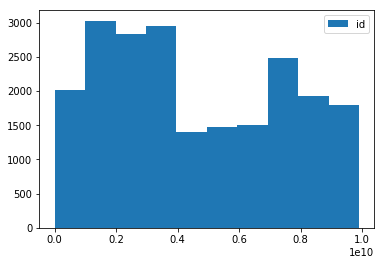

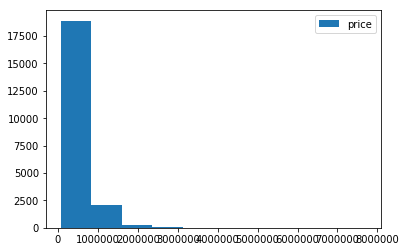

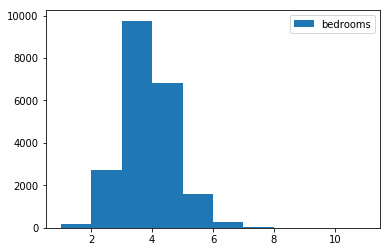

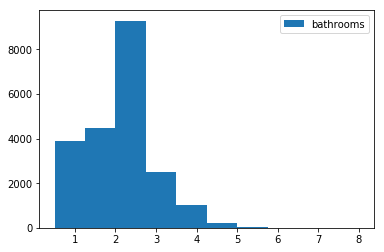

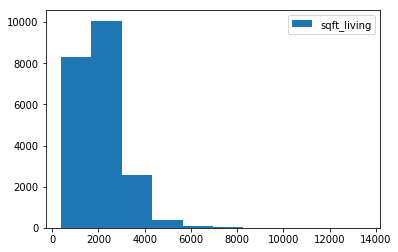

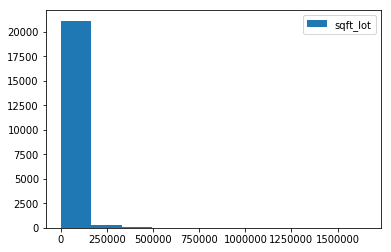

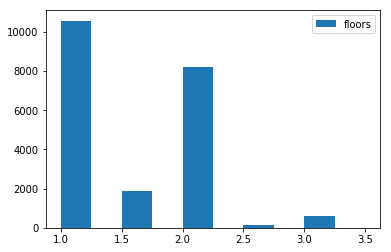

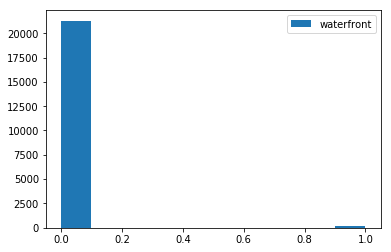

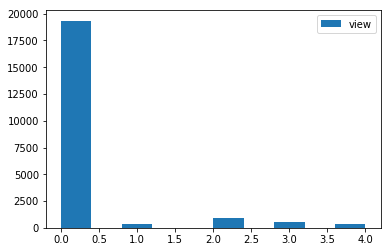

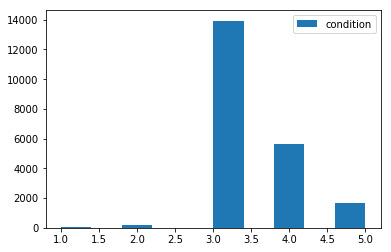

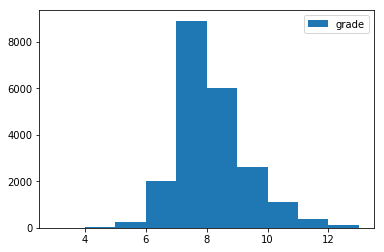

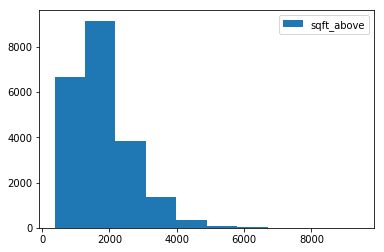

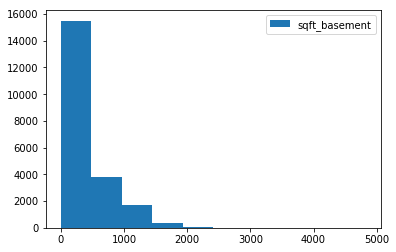

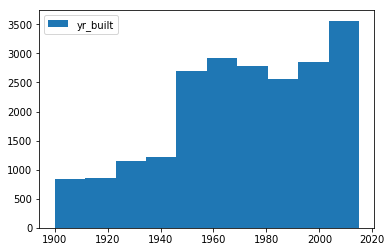

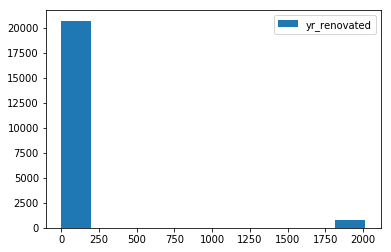

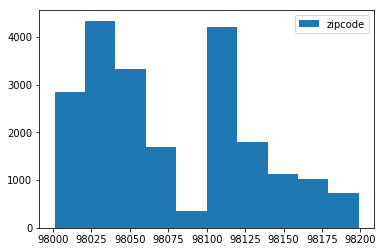

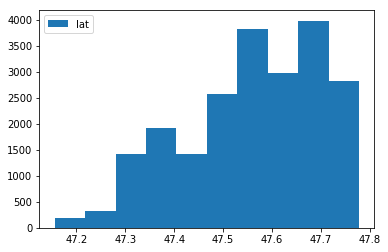

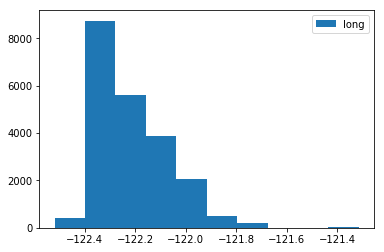

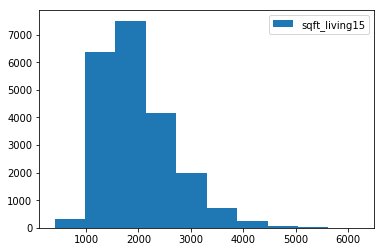

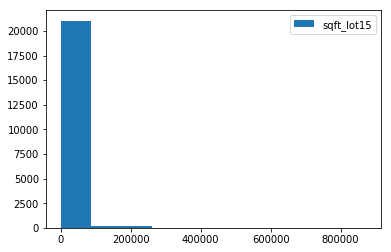

In [36]:
# check histograms for numeric columns after initial cleaning
numeric_cols = df.select_dtypes(include=[np.number]).columns
for col in numeric_cols:
    plt.hist(df[col], label=col)
    plt.legend()
    plt.show();

In [37]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

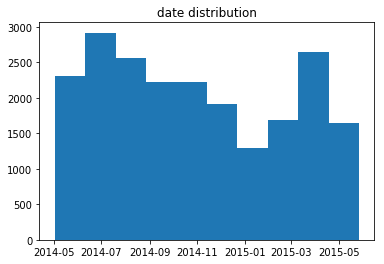

In [38]:
# plots for non-numeric data: date, waterfront, zipcode
plt.hist(df.date)
plt.title('date distribution')
plt.show()

## Question 1: What data will be useful for my analysis and for the stakeholders?

### Process
* Determine which data (if any) will not be useful and drop from the dataset
* Use visualization and Exploratory Data Analysis (EDA) to identify the most useful and promising data

Drop the 'id' column from the dataset as the data already has an index. The specific id used by King County will not be useful in the analysis.

In [39]:
df.drop(['id'], axis=1, inplace=True)

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21427 entries, 0 to 21596
Data columns (total 20 columns):
date             21427 non-null datetime64[ns]
price            21427 non-null float64
bedrooms         21427 non-null int64
bathrooms        21427 non-null float64
sqft_living      21427 non-null int64
sqft_lot         21427 non-null int64
floors           21427 non-null float64
waterfront       21427 non-null float64
view             21427 non-null float64
condition        21427 non-null int64
grade            21427 non-null int64
sqft_above       21427 non-null int64
sqft_basement    21427 non-null float64
yr_built         21427 non-null int64
yr_renovated     21427 non-null float64
zipcode          21427 non-null int64
lat              21427 non-null float64
long             21427 non-null float64
sqft_living15    21427 non-null int64
sqft_lot15       21427 non-null int64
dtypes: datetime64[ns](1), float64(9), int64(10)
memory usage: 3.4 MB


Investigate 'date' column to see if it will be useful in the analysis. 

In [41]:
df.date.describe()

count                   21427
unique                    372
top       2014-06-23 00:00:00
freq                      140
first     2014-05-02 00:00:00
last      2015-05-27 00:00:00
Name: date, dtype: object

Like the house 'id,' the 'date' column was useful in data collection, but will not be useful in predicting home values. With only 372 unique values, there is not much diversity in this column to work with during the analysis. 

In [42]:
df.drop(['date'], axis=1, inplace=True)

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21427 entries, 0 to 21596
Data columns (total 19 columns):
price            21427 non-null float64
bedrooms         21427 non-null int64
bathrooms        21427 non-null float64
sqft_living      21427 non-null int64
sqft_lot         21427 non-null int64
floors           21427 non-null float64
waterfront       21427 non-null float64
view             21427 non-null float64
condition        21427 non-null int64
grade            21427 non-null int64
sqft_above       21427 non-null int64
sqft_basement    21427 non-null float64
yr_built         21427 non-null int64
yr_renovated     21427 non-null float64
zipcode          21427 non-null int64
lat              21427 non-null float64
long             21427 non-null float64
sqft_living15    21427 non-null int64
sqft_lot15       21427 non-null int64
dtypes: float64(9), int64(10)
memory usage: 3.3 MB


In [44]:
df.waterfront.value_counts()

0.0    21283
1.0      144
Name: waterfront, dtype: int64

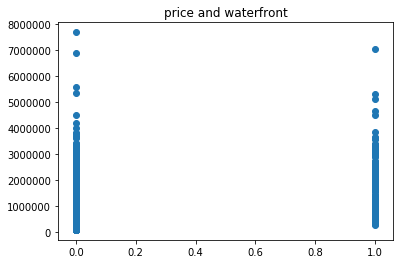

In [45]:
plt.scatter(x=df.waterfront, y=df.price)
plt.title('price and waterfront')
plt.show()

With only 144 assumed waterfront properties, this number is too small to be useful in the analysis (less than 1% of the dataset). Even if all of the waterfront properties were highly valuable, their number is too small to be a reliable predictor. The scatter plot above shows, however, that there is probably not a strong correlation with price and waterfront status, so I will drop this column from the dataframe. 

In [46]:
df.drop(['waterfront'], axis=1, inplace=True)

In [47]:
df.view.value_counts()

0.0    19347
2.0      939
3.0      499
1.0      327
4.0      315
Name: view, dtype: int64

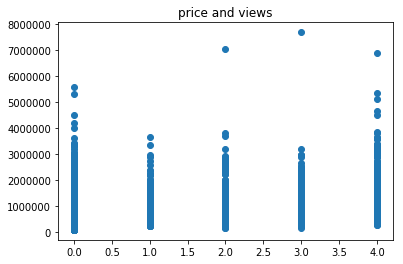

In [48]:
plt.scatter(x=df.view, y=df.price)
plt.title('price and views')
plt.show()

The information on the 'view' column is limited. According to the Kaggle website, this column is described as "has been viewed." I assume that this is the count of how many times a home was viewed before being sold. The histogram and value_counts show that most of the properties have a zero value for this variable. Additionally, the above scatter plot shows that there is no immediately apparent correlation between the amount of views and the price of the home. Most importantly, however, I do not think this variable will be useful for the stakeholders. The amount of times a home is viewed when on the market is not a constant or reliable value, unlike the other variables of square feet or number of bathrooms. This column will be dropped from the dataset.  

In [49]:
df.drop(['view'], axis=1, inplace=True)

In [50]:
df.yr_renovated.describe()

count    21427.000000
mean        68.371447
std        363.046597
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       2015.000000
Name: yr_renovated, dtype: float64

In [51]:
df.yr_renovated.value_counts()

0.0       20693
2014.0       71
2003.0       31
2013.0       31
2007.0       30
2000.0       29
2005.0       29
1990.0       22
2009.0       21
2004.0       21
2006.0       20
1989.0       19
2002.0       17
1998.0       16
1984.0       16
1999.0       15
2008.0       15
1983.0       15
2015.0       14
1987.0       14
2001.0       14
1991.0       14
2010.0       14
1986.0       14
1985.0       14
1992.0       13
1994.0       13
1993.0       12
1997.0       12
1995.0       12
          ...  
1964.0        5
1975.0        5
1973.0        4
1965.0        4
1963.0        4
1981.0        4
1969.0        4
1978.0        3
1960.0        3
1958.0        3
1945.0        3
1955.0        3
1956.0        3
1972.0        3
1974.0        2
1957.0        2
1967.0        2
1940.0        2
1962.0        2
1954.0        1
1971.0        1
1951.0        1
1946.0        1
1976.0        1
1934.0        1
1959.0        1
1953.0        1
1944.0        1
1950.0        1
1948.0        1
Name: yr_renovated, Leng

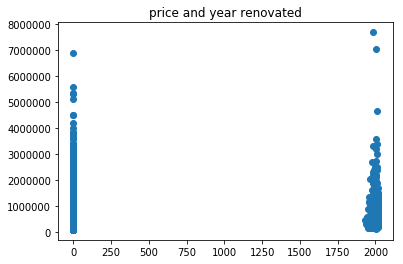

In [52]:
plt.scatter(x=df.yr_renovated, y=df.price)
plt.title('price and year renovated')
plt.show()

Similar to the 'waterfront' variable, not much info can be gleaned from the 'yr_renovated' variable. Most of the homes have a value of zero which either indicates they were never renovated, or there is no information on when they were renovated. The histogram shows that working with only the available data would not be a reliable predictor for home prices. Additionally, the scatter plot above shows no immediately apparently correlation between price and yr_renovated. This column will be dropped from the dataframe. 

In [53]:
df.drop(['yr_renovated'], axis=1, inplace=True)

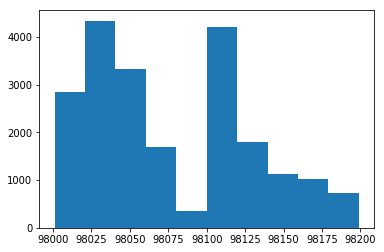

In [54]:
plt.hist(df.zipcode)
plt.show()

In [55]:
df.zipcode = df.zipcode.astype('category')

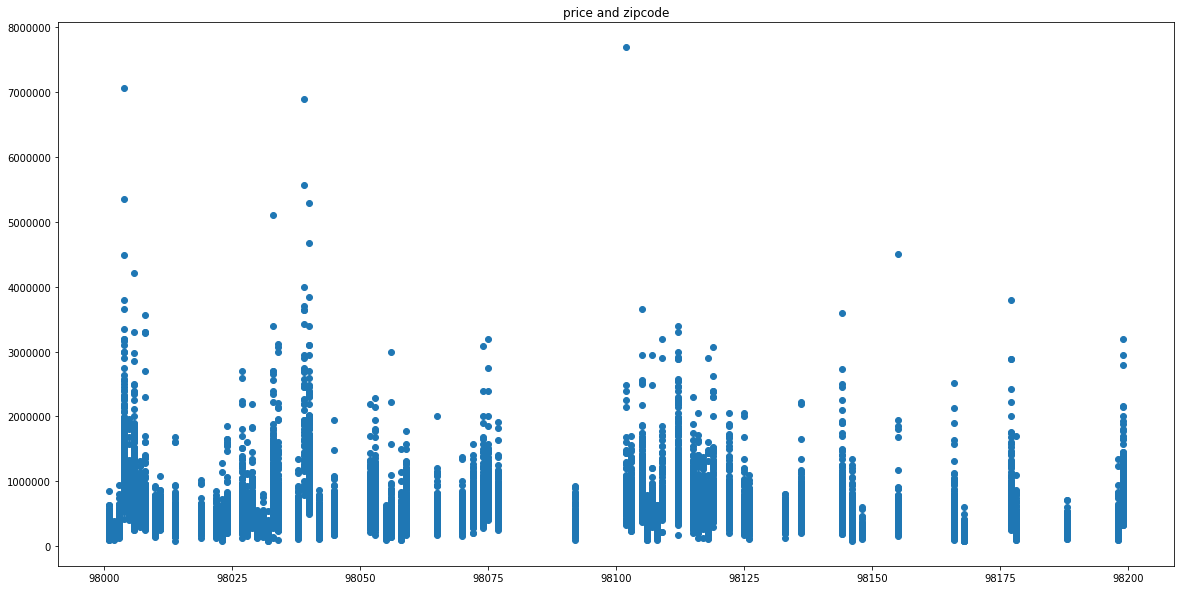

In [56]:
plt.figure(figsize=(20,10))
plt.scatter(x=df.zipcode, y=df.price)
plt.title('price and zipcode')
plt.show()

I don't think the zipcode will be a good predictor for price, but I will keep this variable for now and investigate it more when modeling. 

## Question 2: Which data will I use as the best predictors of price in my model?

### Process
* Check for colinearity
* Feature engineering
    * normalize data as needed
    * scale data as needed
* Create models
* Evaluate models based on various values
    * r-squared and r-squared adjusted 
    * pvalues
    * mean squared error
    * root mean squared error
* Validate models

#### Check for Multicollinearity

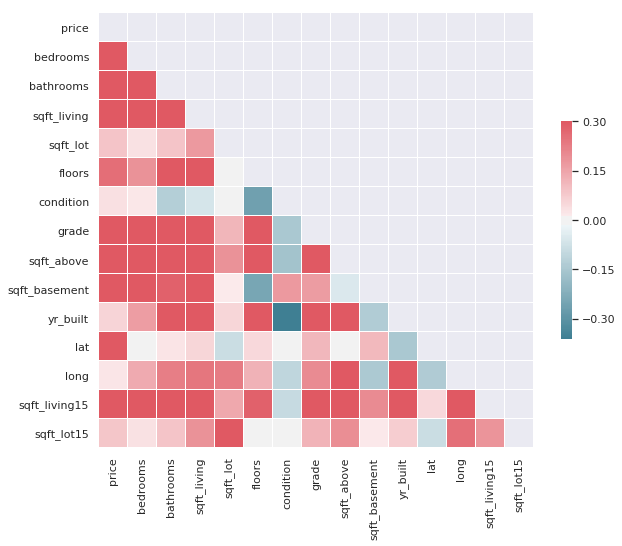

In [57]:
sns.set(style='dark')
corr = df.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(10,8))
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=0.3, center=0, square=True, linewidth=0.5, cbar_kws={'shrink': 0.5});

The correlation heatmap shows that there is some multicollinearity between predictor values. It also gives a first look at variables that may be the best predictors for price: bedrooms, bathrooms, sqft_living, grade, sqft_above, sqft_basement, lat, and sqft_living15. 

### Looking Back: The Great Mansion Hunt
I initially attempted to normalize my data by excluding the outliers I called "the mansions." Although I later discovered a better process of normalizing my data, I included this work to show my process.  

In [58]:
# first look at possible outliers
df.sqft_living.describe()

count    21427.000000
mean      2078.575349
std        917.738233
min        370.000000
25%       1420.000000
50%       1910.000000
75%       2550.000000
max      13540.000000
Name: sqft_living, dtype: float64

In [59]:
# most offensive mansion
df.loc[df.sqft_living == 13540]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
12764,2280000.0,7,8.0,13540,307752,3.0,3,12,9410,4130.0,1999,98053,47.6675,-121.986,4850,217800


In [60]:
# find more offensive mansions (fun fact: realtors classify mansions as any home with a sqft of over 8,000!)
df.loc[df.sqft_living > 10000]
# 3 homes with a sqft of over 10,000

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
3910,7060000.0,5,4.5,10040,37325,2.0,3,11,7680,2360.0,1940,98004,47.6500,-122.214,3930,25449
7245,7700000.0,6,8.0,12050,27600,2.5,4,13,8570,3480.0,1910,98102,47.6298,-122.323,3940,8800
12764,2280000.0,7,8.0,13540,307752,3.0,3,12,9410,4130.0,1999,98053,47.6675,-121.986,4850,217800


In [61]:
df.loc[df.sqft_living > 9000]
# 6 homes with a sqft_living of over 9,000

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
3910,7060000.0,5,4.50,10040,37325,2.0,3,11,7680,2360.0,1940,98004,47.6500,-122.214,3930,25449
4407,5570000.0,5,5.75,9200,35069,2.0,3,13,6200,3000.0,2001,98039,47.6289,-122.233,3560,24345
7245,7700000.0,6,8.00,12050,27600,2.5,4,13,8570,3480.0,1910,98102,47.6298,-122.323,3940,8800
8085,4670000.0,5,6.75,9640,13068,1.0,3,12,4820,4820.0,1983,98040,47.5570,-122.210,3270,10454
9245,6890000.0,6,7.75,9890,31374,2.0,3,13,8860,1030.0,2001,98039,47.6305,-122.240,4540,42730
12764,2280000.0,7,8.00,13540,307752,3.0,3,12,9410,4130.0,1999,98053,47.6675,-121.986,4850,217800


In [62]:
# 'official' mansions, according to the realtors
df.loc[df.sqft_living >= 8000]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
1162,5110000.0,5,5.25,8010,45517,2.0,3,12,5990,2020.0,1999,98033,47.6767,-122.211,3430,26788
1446,5350000.0,5,5.00,8000,23985,2.0,3,12,6720,1280.0,2009,98004,47.6232,-122.220,4600,21750
3910,7060000.0,5,4.50,10040,37325,2.0,3,11,7680,2360.0,1940,98004,47.6500,-122.214,3930,25449
4407,5570000.0,5,5.75,9200,35069,2.0,3,13,6200,3000.0,2001,98039,47.6289,-122.233,3560,24345
7245,7700000.0,6,8.00,12050,27600,2.5,4,13,8570,3480.0,1910,98102,47.6298,-122.323,3940,8800
8085,4670000.0,5,6.75,9640,13068,1.0,3,12,4820,4820.0,1983,98040,47.5570,-122.210,3270,10454
9245,6890000.0,6,7.75,9890,31374,2.0,3,13,8860,1030.0,2001,98039,47.6305,-122.240,4540,42730
12764,2280000.0,7,8.00,13540,307752,3.0,3,12,9410,4130.0,1999,98053,47.6675,-121.986,4850,217800
14542,2890000.0,5,6.25,8670,64033,2.0,3,13,6120,2550.0,1965,98177,47.7295,-122.372,4140,81021
18288,3300000.0,5,6.25,8020,21738,2.0,3,11,8020,0.0,2001,98006,47.5675,-122.189,4160,18969


### Investigating the sqft_living15 and sqft_lot15 variables
The Kaggle website describes the sqft_living15 and sqft_lot15 variables as being the sqft values taken in 2015. If these new values included the 2014 values and were a measurement of the new _total_ sqft values, then the 2015 values should consistently be greater than the original values. However, as shown below, there are over 8000 rows with sqft_living15 and sqft_lot15 values that are _smaller_ than the original values. Could these 2015 values then be a measurement of only the added values (i.e. only the value of the added renovation space or acquired property)? Again, this assumption is also wrong because there are more than 8000 rows where the 2015 values are _larger_ than the original values. Although it is possible that some homes more than doubled their living space or property size, it seems unlikely that so many would have done so in just one year. The meaning of the 2015 variables is therefore unknown and may be an unreliable predictor.  

In [63]:
df.loc[df.sqft_living15 < df.sqft_living].shape

(9731, 16)

In [64]:
df.loc[df.sqft_living15 > df.sqft_living].shape

(9151, 16)

In [65]:
df.loc[df.sqft_lot > df.sqft_lot15].shape

(8528, 16)

In [66]:
df.loc[df.sqft_lot < df.sqft_lot15].shape

(8468, 16)

### Trimming mansions from the dataset
#### Process
* Start with a new dataframe excluding the official realtor's definition of a mansion: any home with over 8,000 sqft
* Examine the summary statistics of the new dataframe using .describe() for clues to investigate major outliers
* None of the qualities used as criteria for dropping from the dataset could represent more than 1% of the new non_mansion dataframe. I chose to use the original size (21417) of the new non_mansion dataframe to compare every variable, although I realize the dataframe does get smaller as I trim outliers from each variable (changing the value of 1%). However, I assumed that many of the outliers shared the same properties (i.e. a house with a large number of bedrooms also has a large number of bathrooms and a greater sqft_living value), so I will also assume that as I work through the dataset dropping mansions, there will be overlap among the outliers (i.e. if the mansions according to bedrooms were already dropped, then the number of bathroom outliers will be smaller before I touch them, making up for the decrease in the overall dataframe).  

#### Criteria
* Homes with more than 6 bedrooms
* Homes with a sqft_living > 5000
* Homes with more than 3 floors 
* Homes with more than 4 bathrooms
* Homes with a sqft_living15 value greater than or equal to 4000
* Properties with a sqft_lot15 value greater than 150,000
* Properties with a sqft_lot value greater than 300,000

In [67]:
# make a new df excluding official mansions
non_mansion_df = df.loc[df['sqft_living'] < 8000].copy()

In [68]:
non_mansion_df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,yr_built,lat,long,sqft_living15,sqft_lot15
count,2.141700e+04,21417.000000,21417.000000,21417.000000,2.141700e+04,21417.000000,21417.00000,21417.000000,21417.000000,21417.000000,21417.000000,21417.000000,21417.000000,21417.000000,21417.000000
mean,5.377286e+05,3.368866,2.112527,2075.013961,1.508761e+04,1.495167,3.40832,7.655367,1788.047953,286.966008,1971.059532,47.559903,-122.213668,1985.871924,12727.244806
std,3.521427e+05,0.901529,0.763186,902.243662,4.145378e+04,0.539777,0.64964,1.170377,819.847106,437.367861,29.347893,0.138707,0.140830,684.617971,27119.735056
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,1.00000,3.000000,370.000000,0.000000,1900.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.210000e+05,3.000000,1.500000,1420.000000,5.042000e+03,1.000000,3.00000,7.000000,1200.000000,0.000000,1952.000000,47.470400,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.620000e+03,1.500000,3.00000,7.000000,1560.000000,0.000000,1975.000000,47.571700,-122.229000,1840.000000,7620.000000
75%,6.434030e+05,4.000000,2.500000,2550.000000,1.065900e+04,2.000000,4.00000,8.000000,2216.000000,550.000000,1997.000000,47.678000,-122.124000,2360.000000,10080.000000
max,5.300000e+06,11.000000,7.500000,7880.000000,1.651359e+06,3.500000,5.00000,13.000000,7880.000000,3500.000000,2015.000000,47.777600,-121.315000,6210.000000,871200.000000


In [69]:
non_mansion_df.loc[non_mansion_df['bedrooms'] > 6].shape

(58, 16)

In [70]:
non_mansion_df.drop(non_mansion_df.loc[non_mansion_df.bedrooms > 6].index, inplace=True)

In [71]:
non_mansion_df.loc[non_mansion_df.sqft_living > 5000].shape

(191, 16)

In [72]:
non_mansion_df.drop(non_mansion_df.loc[non_mansion_df.sqft_living > 5000].index, inplace=True)

In [73]:
non_mansion_df.floors.describe()

count    21168.000000
mean         1.490339
std          0.539014
min          1.000000
25%          1.000000
50%          1.500000
75%          2.000000
max          3.500000
Name: floors, dtype: float64

In [74]:
non_mansion_df.loc[non_mansion_df.floors > 3].shape

(6, 16)

In [75]:
non_mansion_df.drop(non_mansion_df.loc[non_mansion_df.floors > 3].index, inplace=True)

In [76]:
non_mansion_df.drop(non_mansion_df.loc[non_mansion_df.bathrooms > 4].index, inplace=True)

In [77]:
non_mansion_df.loc[non_mansion_df.sqft_living15 >= 4000].shape

(158, 16)

In [78]:
non_mansion_df.drop(non_mansion_df[non_mansion_df.sqft_living15 >= 4000].index, inplace=True)

In [79]:
non_mansion_df.loc[non_mansion_df.sqft_lot15 > 150000].shape

(208, 16)

In [80]:
non_mansion_df.loc[non_mansion_df.sqft_lot > 300000].shape

(64, 16)

In [81]:
non_mansion_df.drop(non_mansion_df[non_mansion_df.sqft_lot > 300000].index, inplace=True)

In [82]:
non_mansion_df.bedrooms.values

array([3, 3, 2, ..., 2, 3, 2])

In [83]:
non_mansion_df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,yr_built,lat,long,sqft_living15,sqft_lot15
count,2.079500e+04,20795.000000,20795.000000,20795.000000,20795.000000,20795.000000,20795.000000,20795.000000,20795.000000,20795.000000,20795.000000,20795.000000,20795.000000,20795.000000,20795.000000
mean,5.126015e+05,3.332051,2.063874,2005.754316,13045.364078,1.483025,3.412407,7.587593,1731.286800,274.467516,1970.604568,47.559483,-122.215807,1944.777639,11845.658764
std,2.943575e+05,0.858515,0.700207,790.226103,25702.037865,0.537500,0.651321,1.086284,735.215626,416.873345,29.289505,0.139277,0.140095,622.267493,22951.367343
min,7.800000e+04,1.000000,0.500000,370.000000,520.000000,1.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,47.155900,-122.515000,399.000000,651.000000
25%,3.190000e+05,3.000000,1.500000,1410.000000,5000.000000,1.000000,3.000000,7.000000,1180.000000,0.000000,1951.000000,47.468300,-122.330000,1480.000000,5067.500000
50%,4.450000e+05,3.000000,2.250000,1880.000000,7526.000000,1.000000,3.000000,7.000000,1540.000000,0.000000,1974.000000,47.571100,-122.234000,1820.000000,7560.000000
75%,6.250000e+05,4.000000,2.500000,2486.500000,10360.500000,2.000000,4.000000,8.000000,2150.000000,530.000000,1996.000000,47.678750,-122.128000,2320.000000,9912.000000
max,3.640000e+06,6.000000,4.000000,5000.000000,295772.000000,3.000000,5.000000,12.000000,4860.000000,2350.000000,2015.000000,47.777600,-121.315000,3990.000000,434728.000000


In [84]:
non_mansion_df.shape

(20795, 16)

### Initial Models

In [85]:
f = 'price~bathrooms + sqft_living + grade + lat'
model = ols(formula=f, data=non_mansion_df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.573
Model:                            OLS   Adj. R-squared:                  0.573
Method:                 Least Squares   F-statistic:                     6966.
Date:                Sat, 27 Oct 2018   Prob (F-statistic):               0.00
Time:                        08:20:58   Log-Likelihood:            -2.8253e+05
No. Observations:               20795   AIC:                         5.651e+05
Df Residuals:                   20790   BIC:                         5.651e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -3.114e+07   4.59e+05    -67.852      0.000    -3.2e+07   -3.02e+07
bathrooms   -2.848e+04   2822.702    -10.088      0.000    -3.4e+04   -2.29e+04
sqft_living   161.7514      2.831     57.134      0.000     156.202     167.301
grade        9.052e+04   1861.115     48.636      0.000    8.69e+04    9.42e+04
lat          6.454e+05   9674.168     66.716      0.000    6.26e+05    6.64e+05
==============================================================================
Omnibus:                    12990.947   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           251811.253
Skew:                           2.675   Prob(JB):                         0.00
Kurtosis:                      19.187   Cond. No.                     7.42e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.42e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [86]:
model.pvalues

Intercept      0.000000e+00
bathrooms      7.050006e-24
sqft_living    0.000000e+00
grade          0.000000e+00
lat            0.000000e+00
dtype: float64

In [87]:
# fit a model to try and get large p-values

f = 'price~yr_built + long'
model = ols(formula=f, data=non_mansion_df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     7.065
Date:                Sat, 27 Oct 2018   Prob (F-statistic):           0.000857
Time:                        08:20:58   Log-Likelihood:            -2.9136e+05
No. Observations:               20795   AIC:                         5.827e+05
Df Residuals:                   20792   BIC:                         5.828e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.238e+06   2.01e+06     -0.614      0.539   -5.19e+06    2.71e+06
yr_built     277.4892     76.266      3.638      0.000     128.003     426.976
long       -9846.8222   1.59e+04     -0.618      0.537   -4.11e+04    2.14e+04
==============================================================================
Omnibus:                    11494.647   Durbin-Watson:                   1.962
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           124844.292
Skew:                           2.462   Prob(JB):                         0.00
Kurtosis:                      13.947   Cond. No.                     1.95e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.95e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The 'long' variable has a large p-value and the model has a terrible R-squared value (which is what I was 
hoping for).

In [88]:
feature_cols = ['sqft_living', 'lat', 'bathrooms', 'grade']
X = non_mansion_df[feature_cols]
y = non_mansion_df['price']

In [89]:
# from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [90]:
# from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [91]:
print(linreg.intercept_, linreg.coef_)

-31190942.192163862 [ 1.62286858e+02  6.46548506e+05 -2.98024176e+04  9.08951307e+04]


In [92]:
yhat_train = linreg.predict(X_train)
yhat_test = linreg.predict(X_test)

train_residuals = yhat_train - y_train
test_residuals = yhat_test - y_test

In [93]:
# from sklearn import metrics
train_mse = metrics.mean_squared_error(y_train, yhat_train)
test_mse = metrics.mean_squared_error(y_test, yhat_test)

print(train_mse, test_mse)

36994430327.68557 37113807220.05773


These mse values are too large to work with, indicating that I need to scale my data to make it easier to understand and evaluate. 

## Standardize values with z-scores

In [94]:
columns_to_convert = ['price', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'lat', 'long', 'sqft_living15', 'sqft_lot15']

new_df = non_mansion_df.copy()

x = non_mansion_df[columns_to_convert].values
x_scaled = zscore(x)
df_temp = pd.DataFrame(x_scaled, columns=columns_to_convert, index=new_df.index)
new_df[columns_to_convert] = df_temp

In [95]:
new_df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
0,-0.987603,3,1.00,-1.044985,-0.287741,1.0,3,7,-0.749848,-0.658411,1955,98178,-0.346674,-0.294041,-0.971917,-0.269954
1,0.086287,3,2.25,0.714048,-0.225799,2.0,3,7,0.596728,0.301136,1951,98125,1.159708,-0.736608,-0.409444,-0.183290
2,-1.129951,2,1.00,-1.563836,-0.118490,1.0,3,6,-1.307521,-0.658411,1933,98028,1.281052,-0.122725,1.245832,-0.164859
3,0.310509,4,3.00,-0.057902,-0.313032,1.0,5,7,-0.926671,1.524558,1965,98136,-0.277745,-1.264833,-0.939775,-0.298275
4,-0.008838,3,2.00,-0.412239,-0.193194,1.0,3,8,-0.069759,-0.658411,1987,98074,0.411543,1.219252,-0.232667,-0.189216


In [96]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20795 entries, 0 to 21596
Data columns (total 16 columns):
price            20795 non-null float64
bedrooms         20795 non-null int64
bathrooms        20795 non-null float64
sqft_living      20795 non-null float64
sqft_lot         20795 non-null float64
floors           20795 non-null float64
condition        20795 non-null int64
grade            20795 non-null int64
sqft_above       20795 non-null float64
sqft_basement    20795 non-null float64
yr_built         20795 non-null int64
zipcode          20795 non-null category
lat              20795 non-null float64
long             20795 non-null float64
sqft_living15    20795 non-null float64
sqft_lot15       20795 non-null float64
dtypes: category(1), float64(11), int64(4)
memory usage: 2.6 MB


In [97]:
new_df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,yr_built,lat,long,sqft_living15,sqft_lot15
count,2.079500e+04,20795.000000,20795.000000,2.079500e+04,2.079500e+04,20795.000000,20795.000000,20795.000000,2.079500e+04,2.079500e+04,20795.000000,2.079500e+04,2.079500e+04,2.079500e+04,2.079500e+04
mean,-3.553568e-17,3.332051,2.063874,-1.284751e-16,-3.280217e-17,1.483025,3.412407,7.587593,9.840650e-17,1.913460e-17,1970.604568,-4.104952e-14,1.286070e-13,-8.063866e-17,-8.200541e-18
std,1.000024e+00,0.858515,0.700207,1.000024e+00,1.000024e+00,0.537500,0.651321,1.086284,1.000024e+00,1.000024e+00,29.289505,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00
min,-1.476477e+00,1.000000,0.500000,-2.070032e+00,-4.873413e-01,1.000000,1.000000,3.000000,-1.851592e+00,-6.584113e-01,1900.000000,-2.897758e+00,-2.135691e+00,-2.484164e+00,-4.877674e-01
25%,-6.577245e-01,3.000000,1.500000,-7.539217e-01,-3.130319e-01,1.000000,3.000000,7.000000,-7.498481e-01,-6.584113e-01,1951.000000,-6.546995e-01,-8.151280e-01,-7.469277e-01,-2.953341e-01
50%,-2.296633e-01,3.000000,2.250000,-1.591410e-01,-2.147494e-01,1.000000,3.000000,7.000000,-2.601841e-01,-6.584113e-01,1974.000000,8.341340e-02,-1.298630e-01,-2.005257e-01,-1.867323e-01
75%,3.818528e-01,4.000000,2.500000,6.083794e-01,-1.044636e-01,2.000000,4.000000,8.000000,5.695244e-01,6.129886e-01,1996.000000,8.563497e-01,6.267838e-01,6.030066e-01,-8.425229e-02
max,1.062475e+01,6.000000,4.000000,3.789191e+00,1.100043e+01,3.000000,5.000000,12.000000,4.255607e+00,4.978928e+00,2015.000000,1.566101e+00,6.430122e+00,3.286804e+00,1.842559e+01


In [98]:
# Find the outliers! Anything with an absolute z-score that is greater than 3

z_score_columns = ['price', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'lat', 'long', 'sqft_living15', 'sqft_lot15']

for col in z_score_columns:
    new_df.drop(new_df.loc[np.abs(new_df[col]) > 3].index, inplace=True)

In [99]:
new_df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,yr_built,lat,long,sqft_living15,sqft_lot15
count,19362.000000,19362.000000,19362.000000,19362.000000,19362.000000,19362.000000,19362.000000,19362.000000,19362.000000,19362.000000,19362.000000,19362.000000,19362.000000,19362.000000,19362.000000
mean,-0.110142,3.306167,2.026263,-0.096186,-0.142331,1.476449,3.413026,7.508264,-0.079788,-0.041613,1970.053817,0.005338,-0.067955,-0.077973,-0.131750
std,0.760439,0.850326,0.681067,0.898600,0.366670,0.538760,0.650080,1.008747,0.920565,0.924063,29.456250,1.005015,0.916996,0.932796,0.349701
min,-1.476477,1.000000,0.500000,-2.070032,-0.487341,1.000000,1.000000,3.000000,-1.851592,-0.658411,1900.000000,-2.750567,-2.114276,-2.386134,-0.487767
25%,-0.678108,3.000000,1.500000,-0.779232,-0.313032,1.000000,3.000000,7.000000,-0.763450,-0.658411,1950.000000,-0.651109,-0.836543,-0.779069,-0.298275
50%,-0.263636,3.000000,2.000000,-0.209761,-0.222765,1.000000,3.000000,7.000000,-0.314591,-0.658411,1972.000000,0.085567,-0.258350,-0.248738,-0.193660
75%,0.296920,4.000000,2.500000,0.486259,-0.124920,2.000000,4.000000,8.000000,0.447108,0.541023,1995.000000,0.868915,0.541126,0.490512,-0.098936
max,2.980796,6.000000,4.000000,2.966622,2.980171,3.000000,5.000000,11.000000,2.990641,2.999862,2015.000000,1.566101,2.989520,2.997533,2.978340


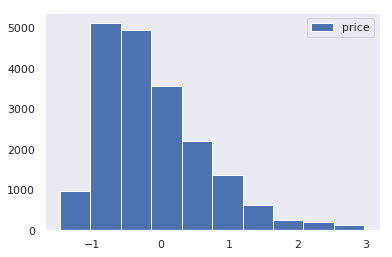

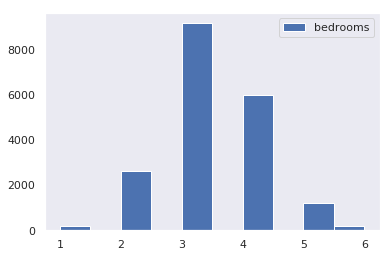

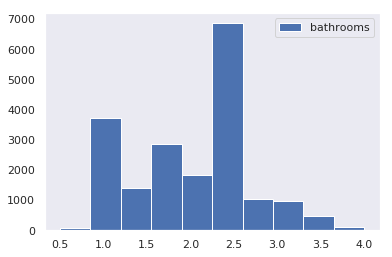

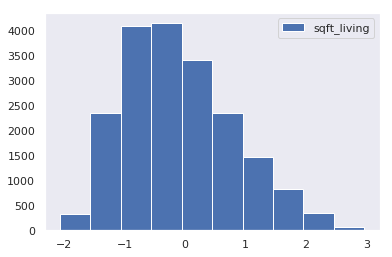

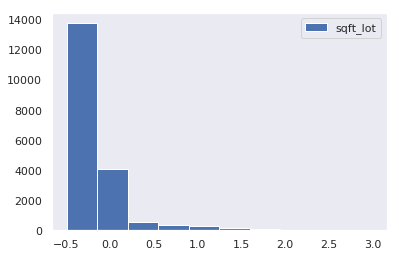

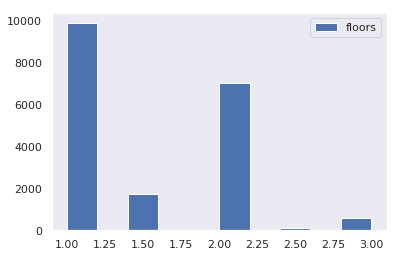

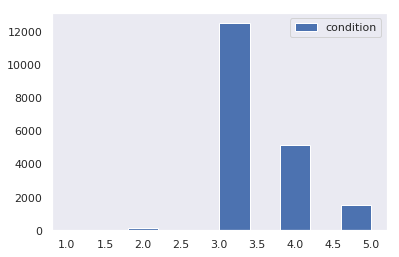

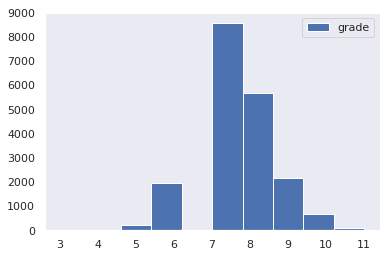

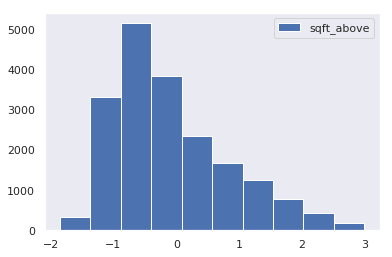

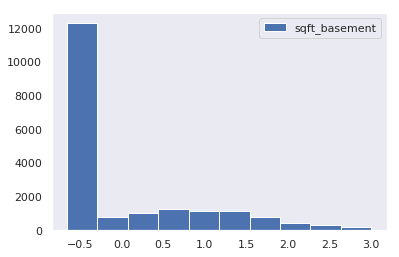

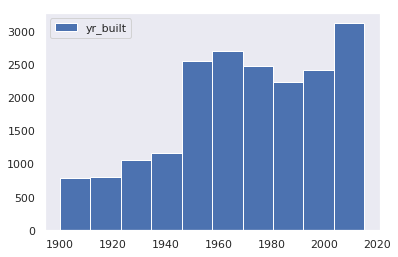

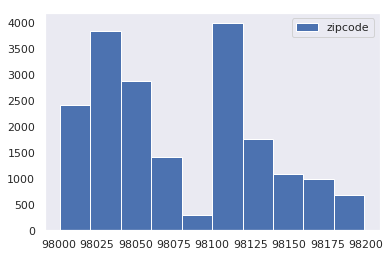

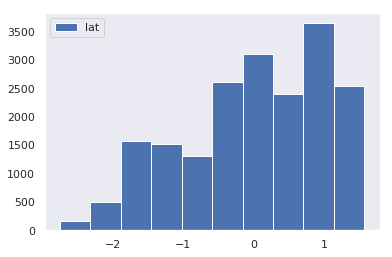

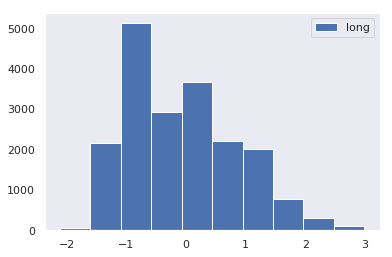

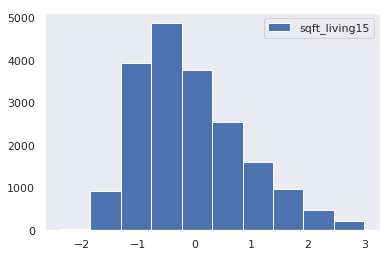

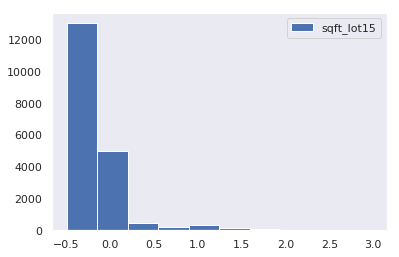

In [100]:
# confirm that my data is a bit more normally distributed

for col in new_df.columns.values:
    plt.hist(new_df[col], label=col)
    plt.legend()
    plt.show();

In [101]:
# Try a model with all of the predictor variables, for fun!
# probably a way to create a loop for this 
# exclude zipcode because the model uses every zipcode

f = 'price~bedrooms + bathrooms + sqft_living + sqft_lot + floors + condition + grade + sqft_above + sqft_basement + yr_built + lat + long + sqft_living15 + sqft_lot15'
model = ols(formula=f, data=new_df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.668
Model:                            OLS   Adj. R-squared:                  0.667
Method:                 Least Squares   F-statistic:                     2990.
Date:                Sat, 27 Oct 2018   Prob (F-statistic):               0.00
Time:                        08:21:01   Log-Likelihood:                -11506.
No. Observations:               19362   AIC:                         2.304e+04
Df Residuals:                   19348   BIC:                         2.315e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        12.2339      0.308     39.745      0.000      11.631      12.837
bedrooms         -0.0559      0.005    -11.613      0.000      -0.065      -0.046
bathrooms         0.1017      0.008     12.814      0.000       0.086       0.117
sqft_living       0.1259      0.004     32.269      0.000       0.118       0.134
sqft_lot          0.0119      0.016      0.735      0.462      -0.020       0.044
floors            0.1088      0.009     12.626      0.000       0.092       0.126
condition         0.0974      0.005     18.349      0.000       0.087       0.108
grade             0.2849      0.005     55.282      0.000       0.275       0.295
sqft_above        0.0964      0.004     24.134      0.000       0.089       0.104
sqft_basement     0.0685      0.004     18.294      0.000       0.061       0.076
yr_built         -0.0076      0.000    -47.518      0.000      -0.008      -0.007
lat               0.2462      0.003     74.325      0.000       0.240       0.253
long             -0.0221      0.004     -5.158      0.000      -0.031      -0.014
sqft_living15     0.1361      0.006     24.583      0.000       0.125       0.147
sqft_lot15       -0.0971      0.017     -5.682      0.000      -0.131      -0.064
==============================================================================
Omnibus:                     3771.501   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            10723.205
Skew:                           1.032   Prob(JB):                         0.00
Kurtosis:                       6.006   Cond. No.                     5.73e+18
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.29e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

The model above has an R-squared value of 0.668, which is not as high as I would like. The P-value for sqft_lot is greater than 0.05, so I can remove that from future models. I can also try just running a model on the values that have been standardized using their z-scores. 

In [102]:
f = 'price~sqft_living + sqft_above + sqft_basement + lat + long + sqft_living15 + sqft_lot15'
model = ols(formula=f, data=new_df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.572
Model:                            OLS   Adj. R-squared:                  0.572
Method:                 Least Squares   F-statistic:                     4313.
Date:                Sat, 27 Oct 2018   Prob (F-statistic):               0.00
Time:                        08:21:01   Log-Likelihood:                -13953.
No. Observations:               19362   AIC:                         2.792e+04
Df Residuals:                   19355   BIC:                         2.797e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -0.0763      0.004    -19.929      0.000      -0.084      -0.069
sqft_living       0.2036      0.003     65.197      0.000       0.198       0.210
sqft_above        0.1729      0.003     51.717      0.000       0.166       0.179
sqft_basement     0.0811      0.003     23.164      0.000       0.074       0.088
lat               0.3007      0.004     83.111      0.000       0.294       0.308
long             -0.1138      0.005    -25.270      0.000      -0.123      -0.105
sqft_living15     0.2067      0.006     34.520      0.000       0.195       0.218
sqft_lot15       -0.0739      0.011     -6.746      0.000      -0.095      -0.052
==============================================================================
Omnibus:                     3303.233   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7794.100
Skew:                           0.973   Prob(JB):                         0.00
Kurtosis:                       5.424   Cond. No.                     6.75e+15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.01e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [103]:
new_df.columns.values

array(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'condition', 'grade', 'sqft_above', 'sqft_basement',
       'yr_built', 'zipcode', 'lat', 'long', 'sqft_living15',
       'sqft_lot15'], dtype=object)

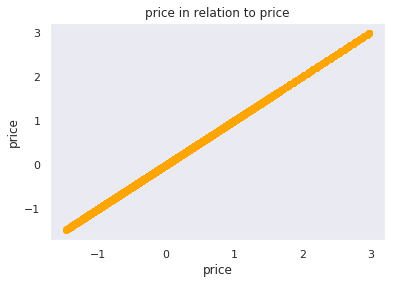

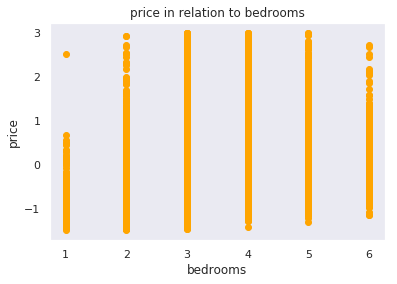

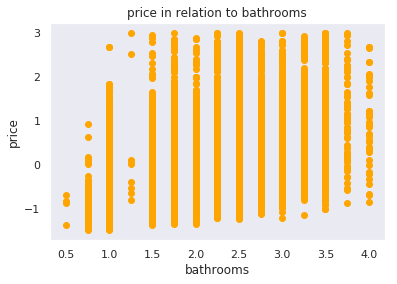

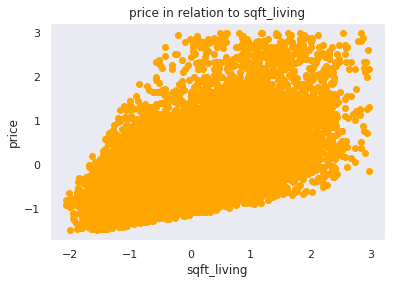

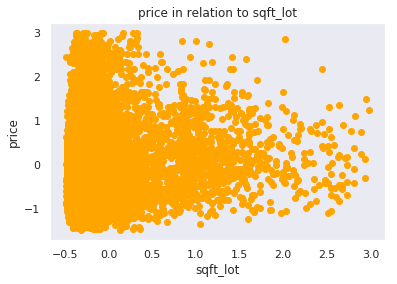

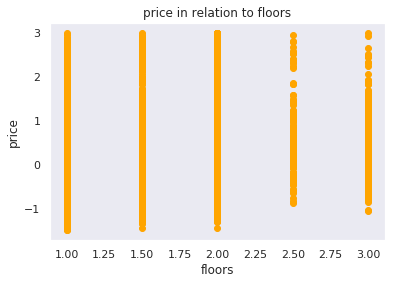

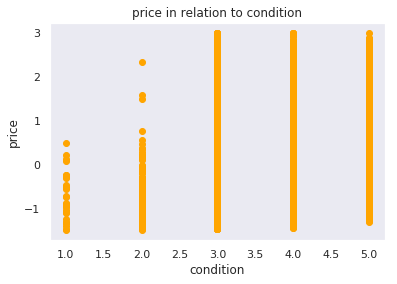

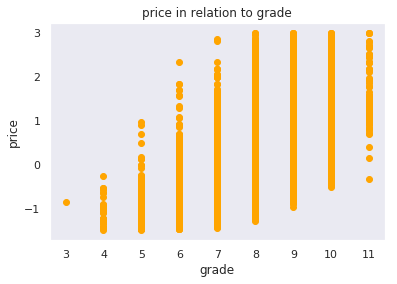

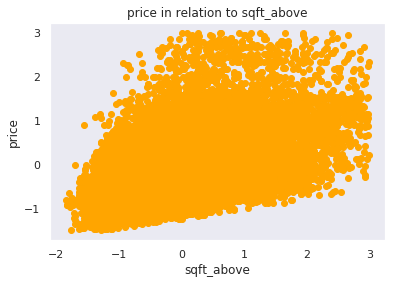

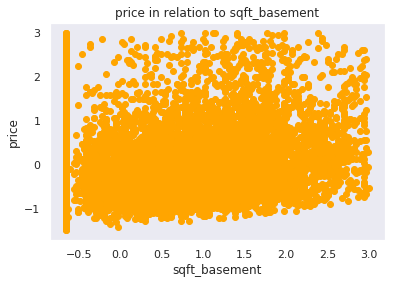

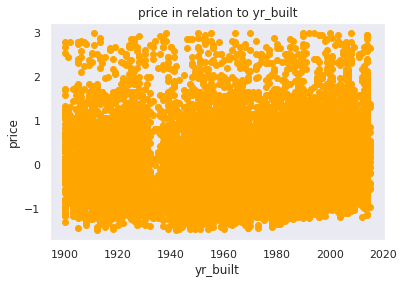

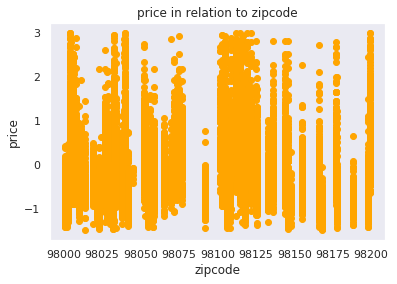

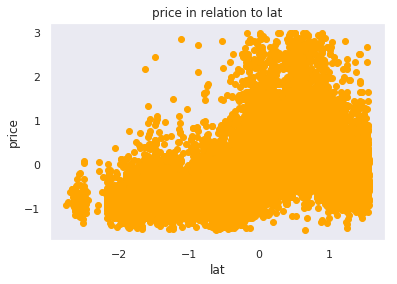

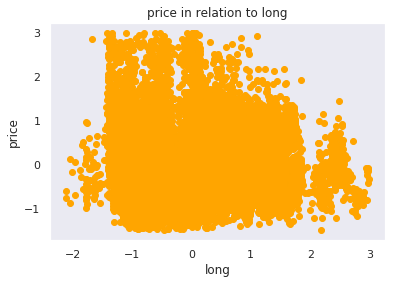

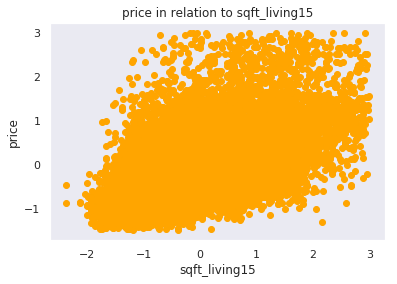

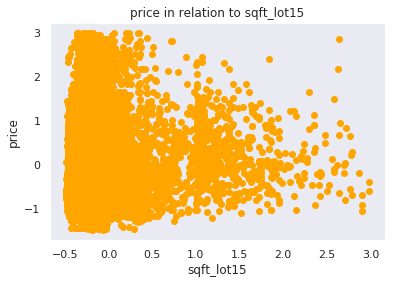

In [104]:
# scatter plots to observe relationships between price and other variables

y = new_df.price
for x in new_df.columns.values:
    plt.scatter(new_df[x], y, color='orange')
    plt.title(f'price in relation to {x}')
    plt.xlabel(f'{x}')
    plt.ylabel('price')
    plt.legend
    plt.show()

In [105]:
# Drop rows from columns which have not been transformed to z-scores based on z-scores greater than the absolute
# value of 3

# omg do something about zip codes 

non_z_scored_columns = ['bedrooms', 'bathrooms', 'floors', 'condition', 'grade', 'yr_built']

for col in non_z_scored_columns:
    new_df.drop(new_df.loc[np.abs((new_df[col] - new_df[col].mean())/new_df[col].std()) > 3].index, inplace=True)

In [106]:
new_df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,yr_built,lat,long,sqft_living15,sqft_lot15
count,19050.000000,19050.000000,19050.000000,19050.000000,19050.000000,19050.000000,19050.000000,19050.000000,19050.000000,19050.000000,19050.000000,19050.000000,19050.000000,19050.000000,19050.000000
mean,-0.118883,3.282310,2.020092,-0.109704,-0.145065,1.475328,3.417165,7.500840,-0.090360,-0.048593,1970.178058,0.002631,-0.068471,-0.086426,-0.133403
std,0.750527,0.809925,0.675876,0.885905,0.362789,0.539135,0.644305,0.977098,0.908951,0.916166,29.420226,1.007172,0.917328,0.924644,0.348256
min,-1.462887,1.000000,0.500000,-2.070032,-0.487341,1.000000,2.000000,5.000000,-1.851592,-0.658411,1900.000000,-2.750567,-2.114276,-2.386134,-0.487767
25%,-0.681506,3.000000,1.500000,-0.779232,-0.313217,1.000000,3.000000,7.000000,-0.777052,-0.658411,1951.000000,-0.662598,-0.836543,-0.779069,-0.298275
50%,-0.273234,3.000000,2.000000,-0.222416,-0.223445,1.000000,3.000000,7.000000,-0.314591,-0.658411,1973.000000,0.083413,-0.265488,-0.264808,-0.194074
75%,0.290125,4.000000,2.500000,0.460950,-0.126515,2.000000,4.000000,8.000000,0.433507,0.541023,1996.000000,0.869633,0.533987,0.477656,-0.101006
max,2.980796,5.000000,4.000000,2.966622,2.980171,3.000000,5.000000,10.000000,2.990641,2.999862,2015.000000,1.566101,2.989520,2.997533,2.978340


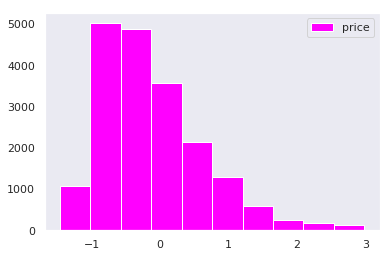

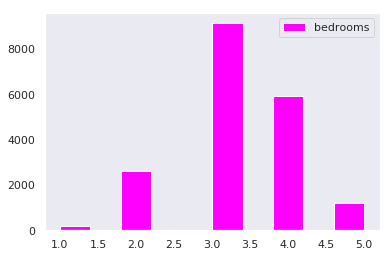

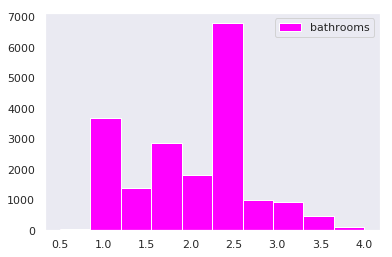

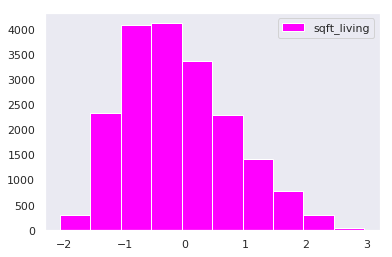

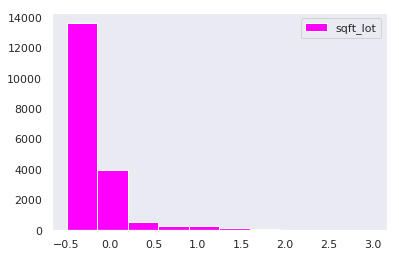

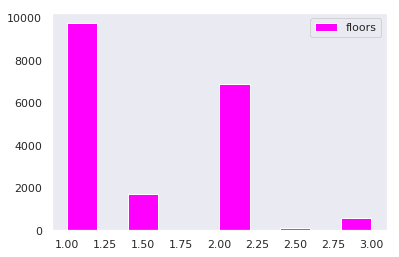

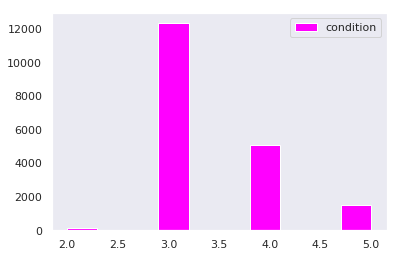

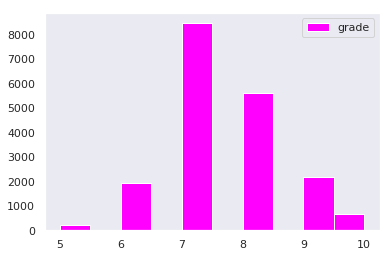

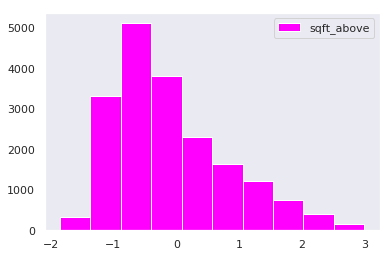

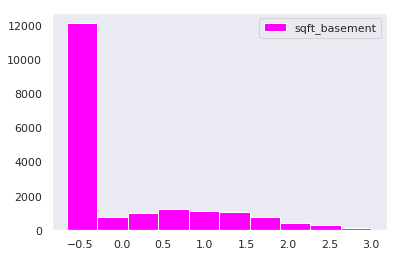

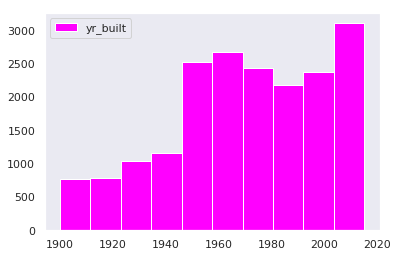

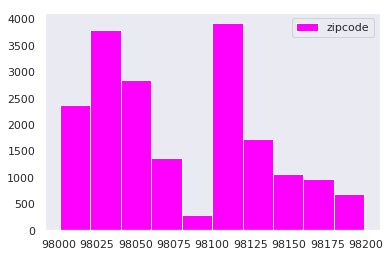

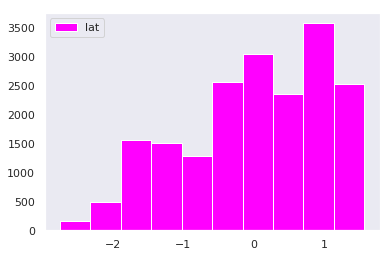

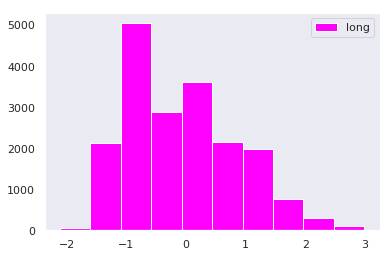

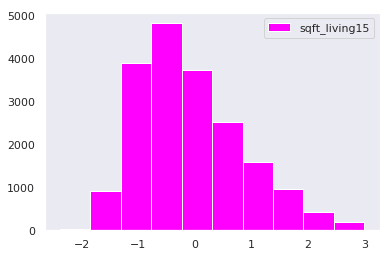

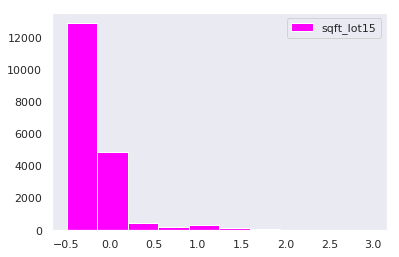

In [107]:
for col in new_df.columns.values:
    plt.hist(new_df[col], label=col, color='magenta')
    plt.legend()
    plt.show();

In [108]:
# run model with all values to see if r-squared changed

f = 'price~bedrooms + bathrooms + sqft_living + sqft_lot + floors + condition + grade + sqft_above + sqft_basement + yr_built + lat + long + sqft_living15 + sqft_lot15'
model = ols(formula=f, data=new_df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.664
Model:                            OLS   Adj. R-squared:                  0.664
Method:                 Least Squares   F-statistic:                     2895.
Date:                Sat, 27 Oct 2018   Prob (F-statistic):               0.00
Time:                        08:21:09   Log-Likelihood:                -11173.
No. Observations:               19050   AIC:                         2.237e+04
Df Residuals:                   19036   BIC:                         2.248e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        12.2127      0.310     39.418      0.000      11.605      12.820
bedrooms         -0.0564      0.005    -11.205      0.000      -0.066      -0.047
bathrooms         0.1006      0.008     12.619      0.000       0.085       0.116
sqft_living       0.1258      0.004     32.127      0.000       0.118       0.133
sqft_lot          0.0028      0.016      0.169      0.865      -0.029       0.035
floors            0.1061      0.009     12.307      0.000       0.089       0.123
condition         0.0988      0.005     18.352      0.000       0.088       0.109
grade             0.2892      0.005     54.631      0.000       0.279       0.300
sqft_above        0.0966      0.004     24.029      0.000       0.089       0.104
sqft_basement     0.0681      0.004     18.096      0.000       0.061       0.075
yr_built         -0.0076      0.000    -47.278      0.000      -0.008      -0.007
lat               0.2457      0.003     74.294      0.000       0.239       0.252
long             -0.0203      0.004     -4.732      0.000      -0.029      -0.012
sqft_living15     0.1349      0.006     24.133      0.000       0.124       0.146
sqft_lot15       -0.0917      0.017     -5.327      0.000      -0.125      -0.058
==============================================================================
Omnibus:                     3778.813   Durbin-Watson:                   1.981
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            11048.577
Skew:                           1.040   Prob(JB):                         0.00
Kurtosis:                       6.097   Cond. No.                     9.18e+18
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 8.78e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


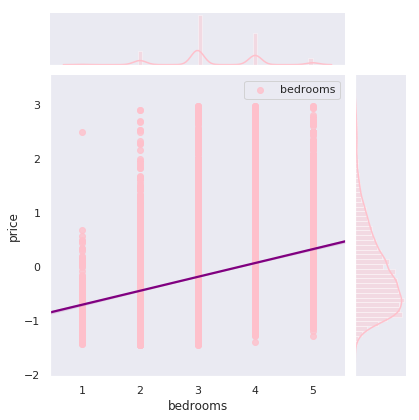

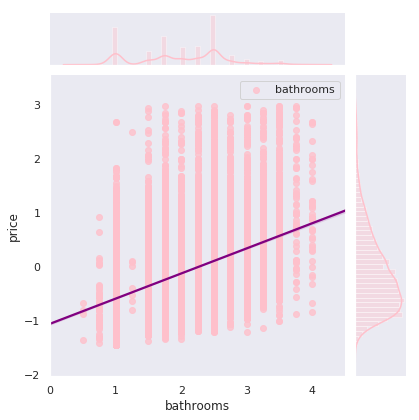

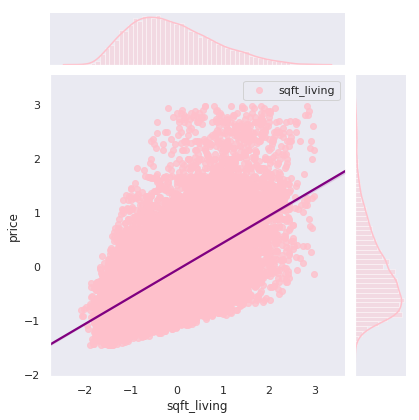

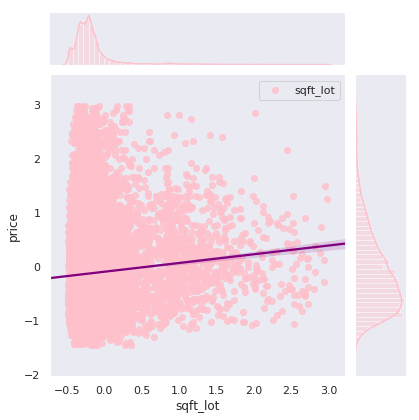

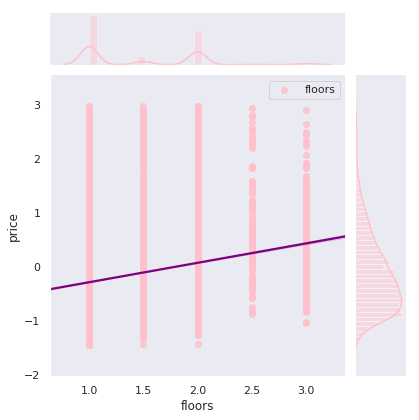

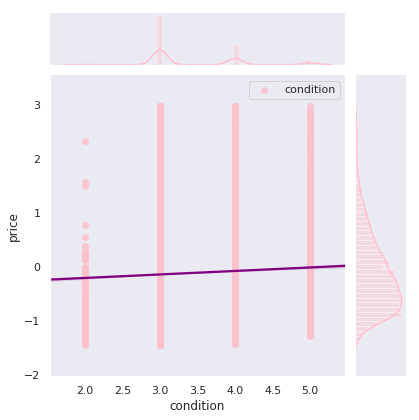

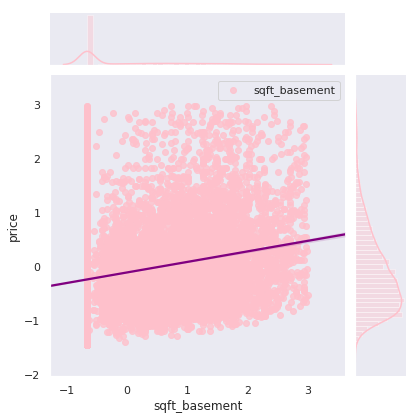

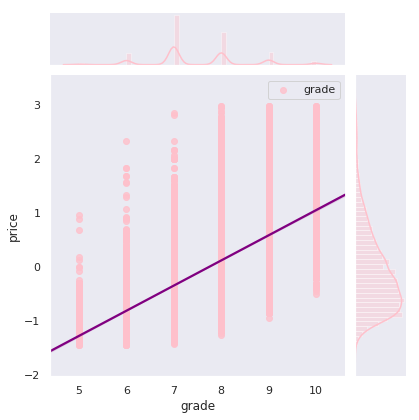

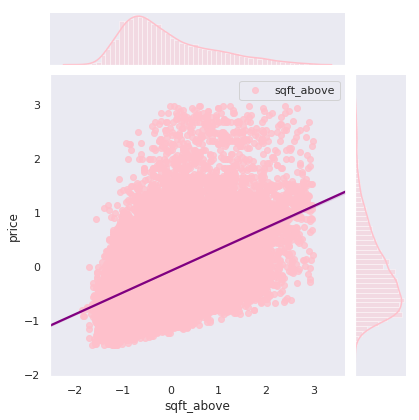

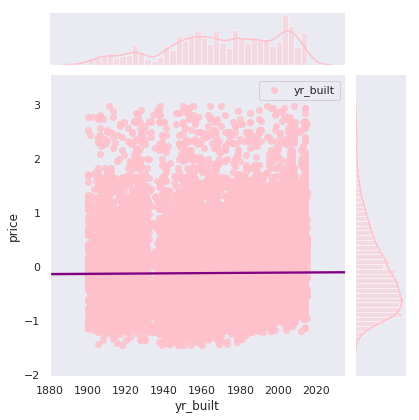

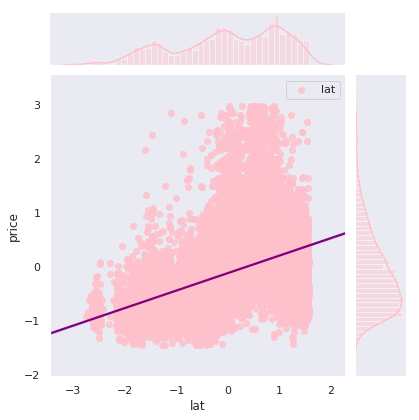

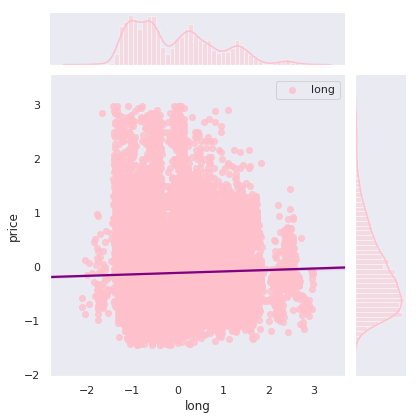

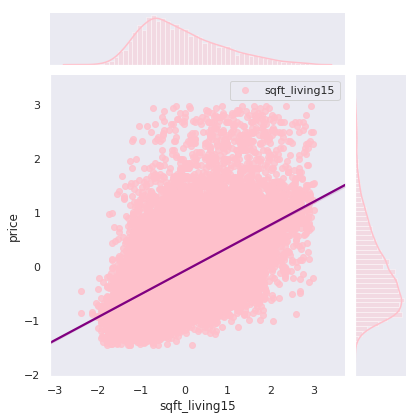

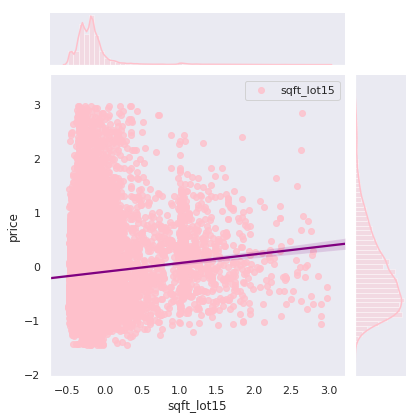

In [109]:
# joint plots to use as a visual for predictor variables to try in the model

columns = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'condition', 'sqft_basement', 'grade', 'sqft_above', 'yr_built', 'lat', 'long', 'sqft_living15', 'sqft_lot15']
for col in columns:
    sns.jointplot(x=col, y='price', data=new_df, kind='reg', label=col, color='pink', joint_kws={'line_kws':{'color':'purple'}})
    plt.legend()
    plt.show()

In [110]:
# Based on the above joint plots, choose variables for a model that appear to have a positive correlation with price

f = 'price~bedrooms + bathrooms + sqft_living + floors + grade + sqft_above + lat'
model = ols(formula=f, data=new_df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.588
Model:                            OLS   Adj. R-squared:                  0.587
Method:                 Least Squares   F-statistic:                     3875.
Date:                Sat, 27 Oct 2018   Prob (F-statistic):               0.00
Time:                        08:21:32   Log-Likelihood:                -13128.
No. Observations:               19050   AIC:                         2.627e+04
Df Residuals:                   19042   BIC:                         2.633e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -1.7897      0.046    -38.818      0.000      -1.880      -1.699
bedrooms       -0.0438      0.006     -7.872      0.000      -0.055      -0.033
bathrooms      -0.0489      0.008     -5.936      0.000      -0.065      -0.033
sqft_living     0.4211      0.010     43.613      0.000       0.402       0.440
floors         -0.0018      0.009     -0.200      0.841      -0.019       0.016
grade           0.2605      0.005     47.617      0.000       0.250       0.271
sqft_above     -0.0837      0.009     -9.782      0.000      -0.100      -0.067
lat             0.2869      0.004     80.543      0.000       0.280       0.294
==============================================================================
Omnibus:                     4394.667   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            12672.342
Skew:                           1.209   Prob(JB):                         0.00
Kurtosis:                       6.180   Cond. No.                         116.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [111]:
# Based on above model, remove 'floors' due to high p-value.

In [112]:
f = 'price~bedrooms + bathrooms + sqft_living + grade + sqft_above + lat'
model = ols(formula=f, data=new_df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.588
Model:                            OLS   Adj. R-squared:                  0.587
Method:                 Least Squares   F-statistic:                     4521.
Date:                Sat, 27 Oct 2018   Prob (F-statistic):               0.00
Time:                        08:21:32   Log-Likelihood:                -13128.
No. Observations:               19050   AIC:                         2.627e+04
Df Residuals:                   19043   BIC:                         2.632e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -1.7902      0.046    -38.880      0.000      -1.880      -1.700
bedrooms       -0.0437      0.006     -7.877      0.000      -0.055      -0.033
bathrooms      -0.0496      0.008     -6.584      0.000      -0.064      -0.035
sqft_living     0.4218      0.009     47.271      0.000       0.404       0.439
grade           0.2604      0.005     47.982      0.000       0.250       0.271
sqft_above     -0.0845      0.008    -11.168      0.000      -0.099      -0.070
lat             0.2868      0.004     80.869      0.000       0.280       0.294
==============================================================================
Omnibus:                     4395.290   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            12676.569
Skew:                           1.210   Prob(JB):                         0.00
Kurtosis:                       6.181   Cond. No.                         114.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [113]:
# try removing bedrooms

f = 'price~bathrooms + sqft_living + grade + sqft_above + lat'
model = ols(formula=f, data=new_df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.586
Model:                            OLS   Adj. R-squared:                  0.586
Method:                 Least Squares   F-statistic:                     5396.
Date:                Sat, 27 Oct 2018   Prob (F-statistic):               0.00
Time:                        08:21:32   Log-Likelihood:                -13159.
No. Observations:               19050   AIC:                         2.633e+04
Df Residuals:                   19044   BIC:                         2.638e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -1.9688      0.040    -49.055      0.000      -2.047      -1.890
bathrooms      -0.0580      0.007     -7.760      0.000      -0.073      -0.043
sqft_living     0.3956      0.008     47.711      0.000       0.379       0.412
grade           0.2669      0.005     49.707      0.000       0.256       0.277
sqft_above     -0.0828      0.008    -10.937      0.000      -0.098      -0.068
lat             0.2884      0.004     81.309      0.000       0.281       0.295
==============================================================================
Omnibus:                     4381.447   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            12547.636
Skew:                           1.208   Prob(JB):                         0.00
Kurtosis:                       6.157   Cond. No.                         91.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [114]:
# remove lat

f = 'price~bedrooms + bathrooms + sqft_living + grade + sqft_above'
model = ols(formula=f, data=new_df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.446
Model:                            OLS   Adj. R-squared:                  0.446
Method:                 Least Squares   F-statistic:                     3065.
Date:                Sat, 27 Oct 2018   Prob (F-statistic):               0.00
Time:                        08:21:32   Log-Likelihood:                -15939.
No. Observations:               19050   AIC:                         3.189e+04
Df Residuals:                   19044   BIC:                         3.194e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -2.1534      0.053    -40.545      0.000      -2.257      -2.049
bedrooms       -0.0689      0.006    -10.730      0.000      -0.081      -0.056
bathrooms      -0.0832      0.009     -9.542      0.000      -0.100      -0.066
sqft_living     0.4888      0.010     47.463      0.000       0.469       0.509
grade           0.3288      0.006     52.931      0.000       0.317       0.341
sqft_above     -0.1778      0.009    -20.524      0.000      -0.195      -0.161
==============================================================================
Omnibus:                     2603.149   Durbin-Watson:                   1.972
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4863.559
Skew:                           0.878   Prob(JB):                         0.00
Kurtosis:                       4.744   Cond. No.                         114.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [115]:
len(new_df.zipcode.unique())

70

In [116]:
# Dealing with zipcodes. . . 
# On the one hand, zipcodes could be useful for those who are interested only in King County homes
# On the other hand, zipcodes would not be useful for predicting values of homes outside of King County
# Will use one-hot encoding because I don't know enough about zip codes to bin them appropriately
# First check to make sure that there is only one categorical value in my dataset

new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19050 entries, 0 to 21596
Data columns (total 16 columns):
price            19050 non-null float64
bedrooms         19050 non-null int64
bathrooms        19050 non-null float64
sqft_living      19050 non-null float64
sqft_lot         19050 non-null float64
floors           19050 non-null float64
condition        19050 non-null int64
grade            19050 non-null int64
sqft_above       19050 non-null float64
sqft_basement    19050 non-null float64
yr_built         19050 non-null int64
zipcode          19050 non-null category
lat              19050 non-null float64
long             19050 non-null float64
sqft_living15    19050 non-null float64
sqft_lot15       19050 non-null float64
dtypes: category(1), float64(11), int64(4)
memory usage: 2.3 MB


In [117]:
new_df = pd.get_dummies(new_df)

In [118]:
new_df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,-0.987603,3,1.00,-1.044985,-0.287741,1.0,3,7,-0.749848,-0.658411,...,0,0,0,0,0,0,1,0,0,0
1,0.086287,3,2.25,0.714048,-0.225799,2.0,3,7,0.596728,0.301136,...,0,0,0,0,0,0,0,0,0,0
2,-1.129951,2,1.00,-1.563836,-0.118490,1.0,3,6,-1.307521,-0.658411,...,0,0,0,0,0,0,0,0,0,0
3,0.310509,4,3.00,-0.057902,-0.313032,1.0,5,7,-0.926671,1.524558,...,0,0,0,0,0,0,0,0,0,0
4,-0.008838,3,2.00,-0.412239,-0.193194,1.0,3,8,-0.069759,-0.658411,...,0,0,0,0,0,0,0,0,0,0


In [119]:
cols = new_df.columns.values
f = 'price ~ ' + ' + '.join(cols)
model = ols(formula=f, data=new_df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.471e+27
Date:                Sat, 27 Oct 2018   Prob (F-statistic):               0.00
Time:                        08:21:32   Log-Likelihood:             5.2254e+05
No. Observations:               19050   AIC:                        -1.045e+06
Df Residuals:                   18966   BIC:                        -1.044e+06
Df Model:                          83                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      1.019e-12   2.34e-13      4.353      0.000     5.6e-13    1.48e-12
price             1.0000   6.56e-15   1.53e+14      0.000       1.000       1.000
bedrooms      -2.917e-14    3.5e-15     -8.326      0.000    -3.6e-14   -2.23e-14
bathrooms      3.141e-14   5.49e-15      5.720      0.000    2.06e-14    4.22e-14
sqft_living     2.05e-15   2.93e-15      0.701      0.484   -3.69e-15    7.79e-15
sqft_lot      -1.539e-15   1.13e-14     -0.136      0.892   -2.37e-14    2.06e-14
floors        -9.867e-15   6.44e-15     -1.533      0.125   -2.25e-14    2.75e-15
condition     -1.901e-15   3.82e-15     -0.497      0.619    -9.4e-15    5.59e-15
grade          3.485e-15      4e-15      0.872      0.383   -4.35e-15    1.13e-14
sqft_above     3.456e-15   3.02e-15      1.143      0.253   -2.47e-15    9.38e-15
sqft_basement  -1.96e-15   2.64e-15     -0.742      0.458   -7.14e-15    3.22e-15
yr_built      -3.615e-16   1.25e-16     -2.885      0.004   -6.07e-16   -1.16e-16
lat            7.541e-15   1.83e-14      0.412      0.680   -2.83e-14    4.34e-14
long          -1.057e-14   1.76e-14     -0.601      0.548   -4.51e-14    2.39e-14
sqft_living15 -3.074e-15   4.02e-15     -0.765      0.445    -1.1e-14    4.81e-15
sqft_lot15     2.671e-15   1.21e-14      0.221      0.825   -2.11e-14    2.64e-14
zipcode_98001  3.277e-14    3.8e-14      0.863      0.388   -4.16e-14    1.07e-13
zipcode_98002  2.829e-14   3.91e-14      0.724      0.469   -4.83e-14    1.05e-13
zipcode_98003  1.884e-14      4e-14      0.471      0.638   -5.96e-14    9.73e-14
zipcode_98004  1.614e-14   2.51e-14      0.644      0.519    -3.3e-14    6.52e-14
zipcode_98005  1.998e-14   2.76e-14      0.725      0.469   -3.41e-14     7.4e-14
zipcode_98006  2.118e-14   1.83e-14      1.158      0.247   -1.47e-14     5.7e-14
zipcode_98007  1.704e-14   2.92e-14      0.584      0.559   -4.02e-14    7.43e-14
zipcode_98008  1.251e-14   2.43e-14      0.515      0.607   -3.51e-14    6.01e-14
zipcode_98010   4.37e-14   4.92e-14      0.888      0.374   -5.27e-14     1.4e-13
zipcode_98011  5.849e-15   3.48e-14      0.168      0.866   -6.23e-14     7.4e-14
zipcode_98014    3.9e-14   5.55e-14      0.703      0.482   -6.98e-14    1.48e-13
zipcode_98019  1.066e-14   4.78e-14      0.223      0.824    -8.3e-14    1.04e-13
zipcode_98022  4.177e-14   5.52e-14      0.757      0.449   -6.64e-14     1.5e-13
zipcode_98023  1.367e-14   4.23e-14      0.323      0.747   -6.93e-14    9.66e-14
zipcode_98024 -2.914e-15   6.06e-14     -0.048      0.962   -1.22e-13    1.16e-13
zipcode_98027  2.081e-14   2.67e-14      0.780      0.435   -3.15e-14    7.31e-14
zipcode_98028 -9.728e-15   3.23e-14     -0.301      0.763    -7.3e-14    5.36e-14
zipcode_98029  2.155e-14   3.16e-14      0.682      0.495   -4.04e-14    8.35e-14
zipcode_98030  2.287e-14   3.12e-14      0.732   

In [120]:
# drop sqft_lot from new_df because it has a consistently high p-value?
# in this model, grade (which I think has a high correlation with price) has a p-value of .38
# using this as a guide, check for zipcode p-values with a p-value below .4
# zipcode_98001, 98006, 90810, 98038, 98040, 98042, 98052, 98055, 98056, 98058, 98059, 98118, 98122, 98178 

In [121]:
promising_zipcodes = ['zipcode_98001',  'zipcode_98006', 'zipcode_98010', 'zipcode_98038', 'zipcode_98040', 'zipcode_98042', 'zipcode_98052', 'zipcode_98055', 'zipcode_98056', 'zipcode_98058', 'zipcode_98059', 'zipcode_98118', 'zipcode_98122', 'zipcode_98178']    

In [210]:
cols_and_promising_zips = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'lat', 'long', 'zipcode_98001',  'zipcode_98006', 'zipcode_98010', 'zipcode_98038', 'zipcode_98040', 'zipcode_98042', 'zipcode_98052', 'zipcode_98055', 'zipcode_98056', 'zipcode_98058', 'zipcode_98059', 'zipcode_98118', 'zipcode_98122', 'zipcode_98178']
f = 'price ~ ' + ' + '.join(cols_and_promising_zips)
model = ols(formula=f, data=new_df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.677
Model:                            OLS   Adj. R-squared:                  0.677
Method:                 Least Squares   F-statistic:                     1598.
Date:                Sat, 27 Oct 2018   Prob (F-statistic):               0.00
Time:                        08:54:45   Log-Likelihood:                -10786.
No. Observations:               19050   AIC:                         2.162e+04
Df Residuals:                   19024   BIC:                         2.183e+04
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        12.0270      0.310     38.832      0.000      11.420      12.634
bedrooms         -0.0610      0.005    -12.330      0.000      -0.071      -0.051
bathrooms         0.1024      0.008     13.083      0.000       0.087       0.118
sqft_living       0.1652      0.003     47.204      0.000       0.158       0.172
sqft_lot         -0.0453      0.009     -4.797      0.000      -0.064      -0.027
floors            0.0875      0.008     10.341      0.000       0.071       0.104
condition         0.0785      0.005     14.665      0.000       0.068       0.089
grade             0.2978      0.005     58.682      0.000       0.288       0.308
sqft_above        0.1364      0.004     37.586      0.000       0.129       0.144
sqft_basement     0.0725      0.004     19.616      0.000       0.065       0.080
yr_built         -0.0075      0.000    -46.559      0.000      -0.008      -0.007
lat               0.2318      0.004     63.357      0.000       0.225       0.239
long             -0.0006      0.004     -0.132      0.895      -0.009       0.008
zipcode_98001    -0.0759      0.024     -3.135      0.002      -0.123      -0.028
zipcode_98006     0.3073      0.023     13.431      0.000       0.262       0.352
zipcode_98010     0.1981      0.049      4.009      0.000       0.101       0.295
zipcode_98038    -0.0383      0.021     -1.856      0.064      -0.079       0.002
zipcode_98040     0.9148      0.032     28.211      0.000       0.851       0.978
zipcode_98042    -0.1397      0.020     -6.875      0.000      -0.180      -0.100
zipcode_98052     0.0757      0.019      3.913      0.000       0.038       0.114
zipcode_98055    -0.2588      0.027     -9.511      0.000      -0.312      -0.205
zipcode_98056    -0.1041      0.022     -4.686      0.000      -0.148      -0.061
zipcode_98058    -0.2411      0.021    -11.229      0.000      -0.283      -0.199
zipcode_98059    -0.0678      0.022     -3.100      0.002      -0.111      -0.025
zipcode_98118    -0.0712      0.020     -3.546      0.000      -0.111      -0.032
zipcode_98122     0.1527      0.027      5.724      0.000       0.100       0.205
zipcode_98178    -0.2398      0.027     -8.745      0.000      -0.294      -0.186
==============================================================================
Omnibus:                     4306.200   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            14924.964
Skew:                           1.121   Prob(JB):                         0.00
Kurtosis:                       6.711   Cond. No.                     1.00e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 7.38e-22. This 

In [211]:
# remove long, zipcode_98038, zipcode_98059, zipcode_98001
cols_and_promising_zips.remove('long')
cols_and_promising_zips.remove('zipcode_98038')
cols_and_promising_zips.remove('zipcode_98059')
cols_and_promising_zips.remove('zipcode_98001')

In [124]:
f = 'price ~ ' + ' + '.join(cols_and_promising_zips)
model = ols(formula=f, data=new_df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.677
Model:                            OLS   Adj. R-squared:                  0.677
Method:                 Least Squares   F-statistic:                     1900.
Date:                Sat, 27 Oct 2018   Prob (F-statistic):               0.00
Time:                        08:21:32   Log-Likelihood:                -10797.
No. Observations:               19050   AIC:                         2.164e+04
Df Residuals:                   19028   BIC:                         2.181e+04
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        12.1620      0.293     41.553      0.000      11.588      12.736
bedrooms         -0.0617      0.005    -12.475      0.000      -0.071      -0.052
bathrooms         0.1025      0.008     13.106      0.000       0.087       0.118
sqft_living       0.1645      0.003     47.499      0.000       0.158       0.171
sqft_lot         -0.0468      0.009     -5.068      0.000      -0.065      -0.029
floors            0.0882      0.008     10.576      0.000       0.072       0.105
condition         0.0780      0.005     14.607      0.000       0.068       0.088
grade             0.2997      0.005     59.617      0.000       0.290       0.310
sqft_above        0.1351      0.003     38.656      0.000       0.128       0.142
sqft_basement     0.0735      0.004     20.302      0.000       0.066       0.081
yr_built         -0.0076      0.000    -49.943      0.000      -0.008      -0.007
lat               0.2367      0.003     69.382      0.000       0.230       0.243
zipcode_98006     0.3123      0.023     13.725      0.000       0.268       0.357
zipcode_98010     0.2130      0.049      4.351      0.000       0.117       0.309
zipcode_98040     0.9197      0.032     28.366      0.000       0.856       0.983
zipcode_98042    -0.1257      0.020     -6.329      0.000      -0.165      -0.087
zipcode_98052     0.0774      0.019      4.034      0.000       0.040       0.115
zipcode_98055    -0.2497      0.027     -9.213      0.000      -0.303      -0.197
zipcode_98056    -0.0958      0.022     -4.333      0.000      -0.139      -0.052
zipcode_98058    -0.2309      0.021    -10.876      0.000      -0.273      -0.189
zipcode_98118    -0.0671      0.020     -3.344      0.001      -0.106      -0.028
zipcode_98122     0.1533      0.027      5.745      0.000       0.101       0.206
zipcode_98178    -0.2331      0.027     -8.516      0.000      -0.287      -0.179
==============================================================================
Omnibus:                     4331.507   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            15047.795
Skew:                           1.127   Prob(JB):                         0.00
Kurtosis:                       6.725   Cond. No.                     9.64e+18
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 7.96e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [125]:
cols_and_promising_zips.remove('zipcode_98118')
cols_and_promising_zips.remove('sqft_lot')

In [126]:
f = 'price ~ ' + ' + '.join(cols_and_promising_zips)
model = ols(formula=f, data=new_df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.676
Model:                            OLS   Adj. R-squared:                  0.676
Method:                 Least Squares   F-statistic:                     2094.
Date:                Sat, 27 Oct 2018   Prob (F-statistic):               0.00
Time:                        08:21:32   Log-Likelihood:                -10814.
No. Observations:               19050   AIC:                         2.167e+04
Df Residuals:                   19030   BIC:                         2.183e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        12.0948      0.291     41.503      0.000      11.524      12.666
bedrooms         -0.0606      0.005    -12.252      0.000      -0.070      -0.051
bathrooms         0.1048      0.008     13.413      0.000       0.089       0.120
sqft_living       0.1606      0.003     47.520      0.000       0.154       0.167
floors            0.0968      0.008     11.912      0.000       0.081       0.113
condition         0.0782      0.005     14.666      0.000       0.068       0.089
grade             0.2997      0.005     59.608      0.000       0.290       0.310
sqft_above        0.1309      0.003     38.707      0.000       0.124       0.138
sqft_basement     0.0736      0.004     20.343      0.000       0.067       0.081
yr_built         -0.0075      0.000    -49.951      0.000      -0.008      -0.007
lat               0.2378      0.003     69.782      0.000       0.231       0.244
zipcode_98006     0.3129      0.023     13.742      0.000       0.268       0.358
zipcode_98010     0.1957      0.049      4.007      0.000       0.100       0.291
zipcode_98040     0.9218      0.032     28.407      0.000       0.858       0.985
zipcode_98042    -0.1272      0.020     -6.402      0.000      -0.166      -0.088
zipcode_98052     0.0787      0.019      4.101      0.000       0.041       0.116
zipcode_98055    -0.2452      0.027     -9.045      0.000      -0.298      -0.192
zipcode_98056    -0.0914      0.022     -4.131      0.000      -0.135      -0.048
zipcode_98058    -0.2302      0.021    -10.838      0.000      -0.272      -0.189
zipcode_98122     0.1616      0.027      6.059      0.000       0.109       0.214
zipcode_98178    -0.2284      0.027     -8.342      0.000      -0.282      -0.175
==============================================================================
Omnibus:                     4309.864   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            14930.289
Skew:                           1.123   Prob(JB):                         0.00
Kurtosis:                       6.711   Cond. No.                     5.16e+18
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.78e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


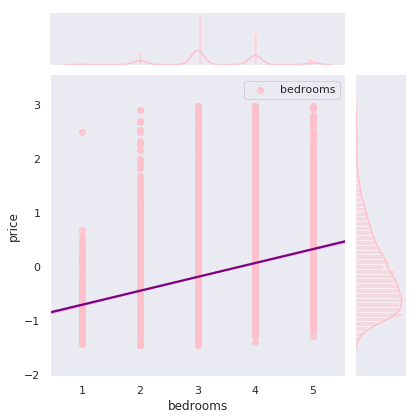

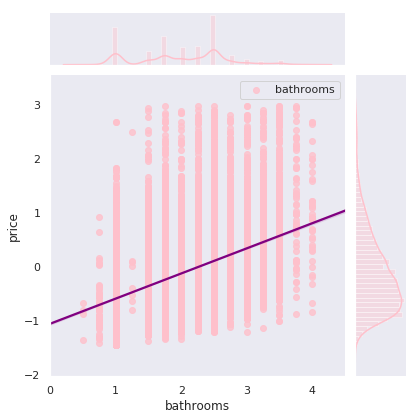

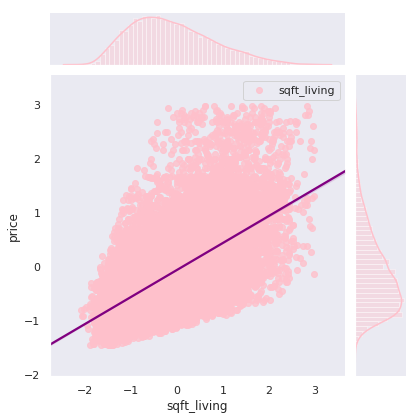

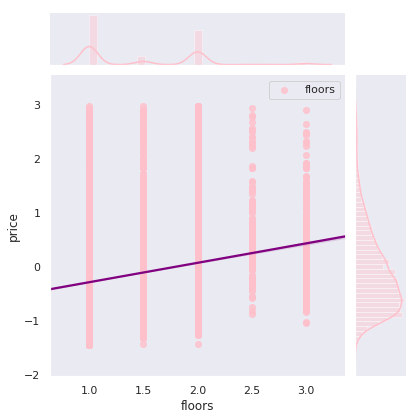

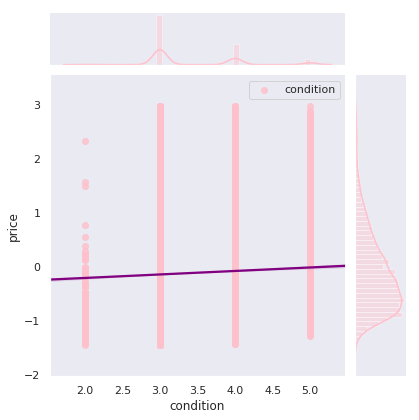

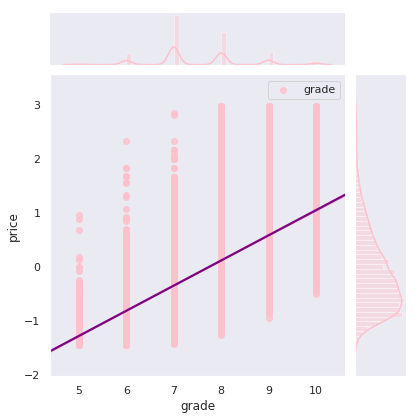

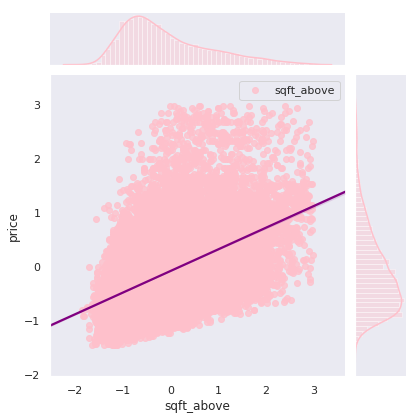

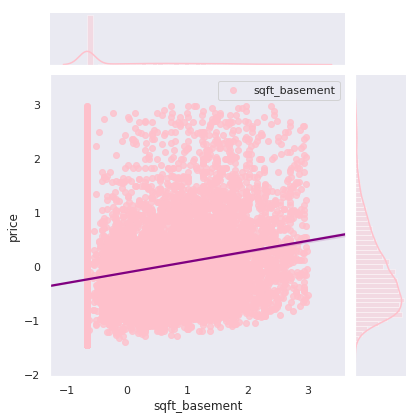

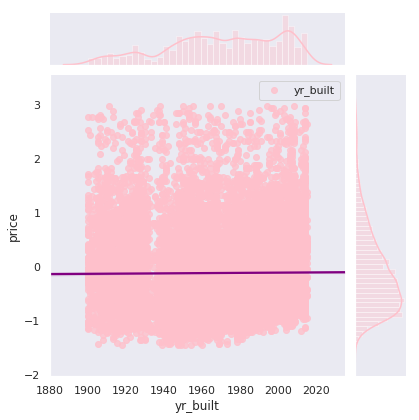

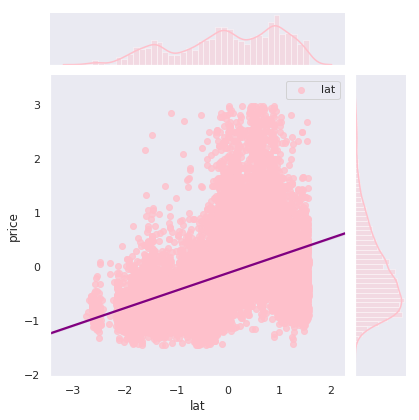

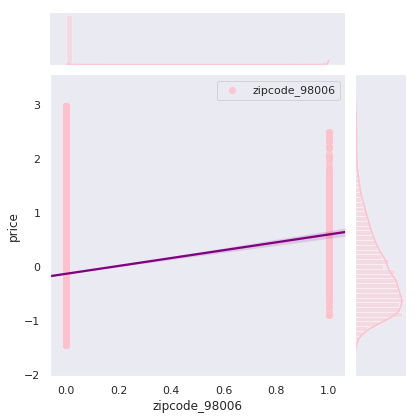

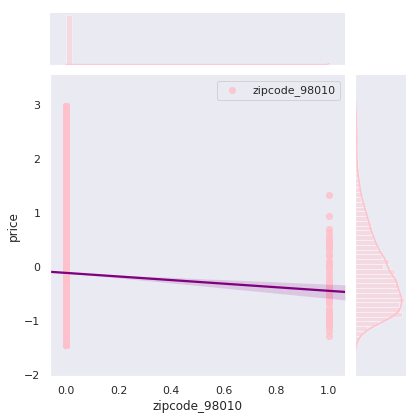

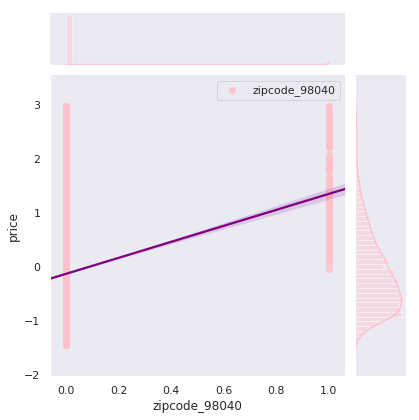

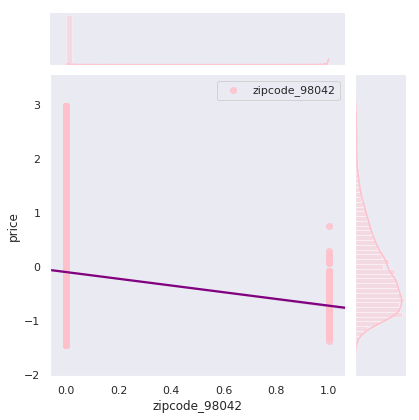

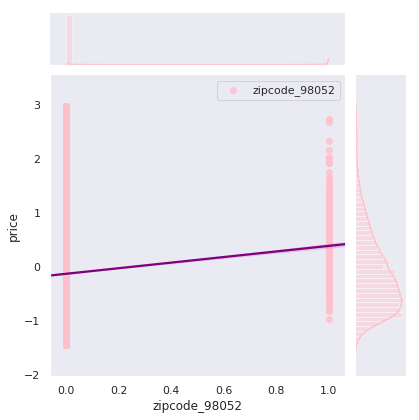

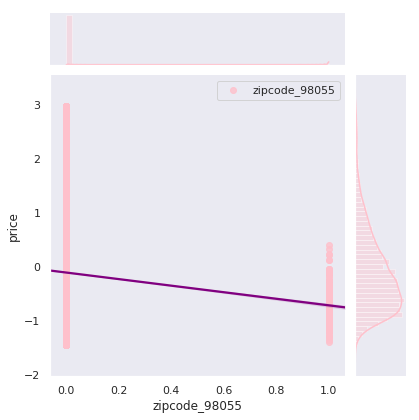

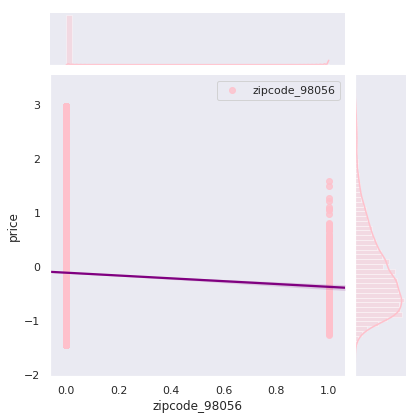

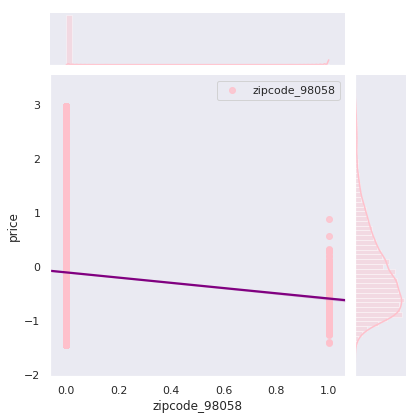

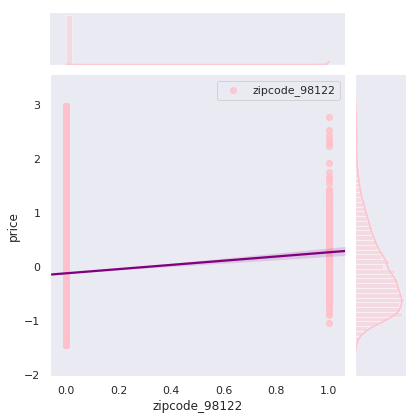

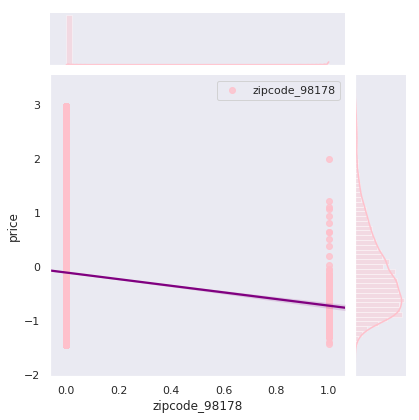

In [127]:
# joint plots with zipcodes

for col in cols_and_promising_zips:
    sns.jointplot(x=col, y='price', data=new_df, kind='reg', label=col, color='pink', joint_kws={'line_kws':{'color':'purple'}})
    plt.legend()
    plt.show()

In [128]:
# remove variables based on poor linear relationship with price
cols_and_promising_zips.remove('condition')
cols_and_promising_zips.remove('yr_built')
cols_and_promising_zips.remove('zipcode_98122')
cols_and_promising_zips.remove('zipcode_98056')
cols_and_promising_zips.remove('zipcode_98010')

In [129]:
f = 'price ~ ' + ' + '.join(cols_and_promising_zips)
model = ols(formula=f, data=new_df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.615
Model:                            OLS   Adj. R-squared:                  0.615
Method:                 Least Squares   F-statistic:                     2172.
Date:                Sat, 27 Oct 2018   Prob (F-statistic):               0.00
Time:                        08:22:05   Log-Likelihood:                -12470.
No. Observations:               19050   AIC:                         2.497e+04
Df Residuals:                   19035   BIC:                         2.509e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -1.6629      0.045    -37.125      0.000      -1.751      -1.575
bedrooms         -0.0461      0.005     -8.558      0.000      -0.057      -0.036
bathrooms        -0.0424      0.008     -5.313      0.000      -0.058      -0.027
sqft_living       0.1856      0.004     51.012      0.000       0.178       0.193
floors            0.0107      0.009      1.232      0.218      -0.006       0.028
grade             0.2405      0.005     45.054      0.000       0.230       0.251
sqft_above        0.1324      0.004     36.135      0.000       0.125       0.140
sqft_basement     0.1183      0.004     30.621      0.000       0.111       0.126
lat               0.2742      0.004     75.996      0.000       0.267       0.281
zipcode_98006     0.3318      0.025     13.409      0.000       0.283       0.380
zipcode_98040     1.0284      0.035     29.159      0.000       0.959       1.098
zipcode_98042    -0.1773      0.022     -8.227      0.000      -0.219      -0.135
zipcode_98052    -0.0098      0.021     -0.469      0.639      -0.051       0.031
zipcode_98055    -0.2561      0.030     -8.667      0.000      -0.314      -0.198
zipcode_98058    -0.2649      0.023    -11.455      0.000      -0.310      -0.220
zipcode_98178    -0.2332      0.030     -7.822      0.000      -0.292      -0.175
==============================================================================
Omnibus:                     4686.685   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            15005.596
Skew:                           1.250   Prob(JB):                         0.00
Kurtosis:                       6.558   Cond. No.                     4.74e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 6.42e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [130]:
# remove variables based on p-values
cols_and_promising_zips.remove('zipcode_98052')
cols_and_promising_zips.remove('floors')

In [131]:
f = 'price ~ ' + ' + '.join(cols_and_promising_zips)
model = ols(formula=f, data=new_df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.615
Model:                            OLS   Adj. R-squared:                  0.615
Method:                 Least Squares   F-statistic:                     2534.
Date:                Sat, 27 Oct 2018   Prob (F-statistic):               0.00
Time:                        08:22:05   Log-Likelihood:                -12471.
No. Observations:               19050   AIC:                         2.497e+04
Df Residuals:                   19037   BIC:                         2.507e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -1.6597      0.045    -37.108      0.000      -1.747      -1.572
bedrooms         -0.0465      0.005     -8.669      0.000      -0.057      -0.036
bathrooms        -0.0384      0.007     -5.265      0.000      -0.053      -0.024
sqft_living       0.1853      0.004     51.027      0.000       0.178       0.192
grade             0.2413      0.005     45.659      0.000       0.231       0.252
sqft_above        0.1333      0.004     37.217      0.000       0.126       0.140
sqft_basement     0.1161      0.003     33.806      0.000       0.109       0.123
lat               0.2743      0.004     77.019      0.000       0.267       0.281
zipcode_98006     0.3306      0.025     13.388      0.000       0.282       0.379
zipcode_98040     1.0265      0.035     29.160      0.000       0.958       1.096
zipcode_98042    -0.1777      0.022     -8.251      0.000      -0.220      -0.136
zipcode_98055    -0.2565      0.030     -8.682      0.000      -0.314      -0.199
zipcode_98058    -0.2660      0.023    -11.515      0.000      -0.311      -0.221
zipcode_98178    -0.2333      0.030     -7.827      0.000      -0.292      -0.175
==============================================================================
Omnibus:                     4691.961   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            15013.100
Skew:                           1.251   Prob(JB):                         0.00
Kurtosis:                       6.557   Cond. No.                     4.37e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 7.31e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [132]:
# remove some of the lower absolute coefficients
cols_and_promising_zips.remove('bedrooms')
cols_and_promising_zips.remove('bathrooms')

In [133]:
f = 'price ~ ' + ' + '.join(cols_and_promising_zips)
model = ols(formula=f, data=new_df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.613
Model:                            OLS   Adj. R-squared:                  0.612
Method:                 Least Squares   F-statistic:                     3011.
Date:                Sat, 27 Oct 2018   Prob (F-statistic):               0.00
Time:                        08:22:05   Log-Likelihood:                -12530.
No. Observations:               19050   AIC:                         2.508e+04
Df Residuals:                   19039   BIC:                         2.517e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -1.8866      0.039    -48.782      0.000      -1.962      -1.811
sqft_living       0.1609      0.003     56.351      0.000       0.155       0.167
grade             0.2402      0.005     47.257      0.000       0.230       0.250
sqft_above        0.1140      0.003     36.622      0.000       0.108       0.120
sqft_basement     0.1040      0.003     31.926      0.000       0.098       0.110
lat               0.2772      0.004     77.808      0.000       0.270       0.284
zipcode_98006     0.3315      0.025     13.399      0.000       0.283       0.380
zipcode_98040     1.0271      0.035     29.112      0.000       0.958       1.096
zipcode_98042    -0.1822      0.022     -8.436      0.000      -0.225      -0.140
zipcode_98055    -0.2553      0.030     -8.615      0.000      -0.313      -0.197
zipcode_98058    -0.2718      0.023    -11.736      0.000      -0.317      -0.226
zipcode_98178    -0.2332      0.030     -7.803      0.000      -0.292      -0.175
==============================================================================
Omnibus:                     4722.900   Durbin-Watson:                   1.981
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            14995.430
Skew:                           1.262   Prob(JB):                         0.00
Kurtosis:                       6.538   Cond. No.                     5.44e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.75e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [201]:
# add bathrooms back because I like that scatter plot
cols_and_promising_zips.append('bathrooms')
f = 'price ~ ' + ' + '.join(cols_and_promising_zips)
model = ols(formula=f, data=new_df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.614
Model:                            OLS   Adj. R-squared:                  0.613
Method:                 Least Squares   F-statistic:                     2747.
Date:                Sat, 27 Oct 2018   Prob (F-statistic):               0.00
Time:                        08:27:12   Log-Likelihood:                -12508.
No. Observations:               19050   AIC:                         2.504e+04
Df Residuals:                   19038   BIC:                         2.514e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -1.8503      0.039    -47.410      0.000      -1.927      -1.774
sqft_living       0.1712      0.003     52.620      0.000       0.165       0.178
grade             0.2484      0.005     47.499      0.000       0.238       0.259
sqft_above        0.1222      0.003     36.456      0.000       0.116       0.129
sqft_basement     0.1090      0.003     32.617      0.000       0.102       0.116
lat               0.2758      0.004     77.365      0.000       0.269       0.283
zipcode_98006     0.3253      0.025     13.155      0.000       0.277       0.374
zipcode_98040     1.0193      0.035     28.905      0.000       0.950       1.088
zipcode_98042    -0.1796      0.022     -8.322      0.000      -0.222      -0.137
zipcode_98055    -0.2540      0.030     -8.583      0.000      -0.312      -0.196
zipcode_98058    -0.2725      0.023    -11.781      0.000      -0.318      -0.227
zipcode_98178    -0.2374      0.030     -7.949      0.000      -0.296      -0.179
bathrooms        -0.0475      0.007     -6.559      0.000      -0.062      -0.033
==============================================================================
Omnibus:                     4684.497   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            14901.835
Skew:                           1.251   Prob(JB):                         0.00
Kurtosis:                       6.537   Cond. No.                     1.02e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.15e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [214]:
# Go back to previous model with an r-squared of 0.667
print(cols_and_promising_zips)
final_cols_and_zips = cols_and_promising_zips
final_cols_and_zips

['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'lat', 'zipcode_98006', 'zipcode_98010', 'zipcode_98040', 'zipcode_98042', 'zipcode_98052', 'zipcode_98055', 'zipcode_98056', 'zipcode_98058', 'zipcode_98118', 'zipcode_98122', 'zipcode_98178']


['bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'lat',
 'zipcode_98006',
 'zipcode_98010',
 'zipcode_98040',
 'zipcode_98042',
 'zipcode_98052',
 'zipcode_98055',
 'zipcode_98056',
 'zipcode_98058',
 'zipcode_98118',
 'zipcode_98122',
 'zipcode_98178']

In [215]:
f = 'price ~ ' + ' + '.join(final_cols_and_zips)
model = ols(formula=f, data=new_df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.677
Model:                            OLS   Adj. R-squared:                  0.677
Method:                 Least Squares   F-statistic:                     1900.
Date:                Sat, 27 Oct 2018   Prob (F-statistic):               0.00
Time:                        08:57:06   Log-Likelihood:                -10797.
No. Observations:               19050   AIC:                         2.164e+04
Df Residuals:                   19028   BIC:                         2.181e+04
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        12.1620      0.293     41.553      0.000      11.588      12.736
bedrooms         -0.0617      0.005    -12.475      0.000      -0.071      -0.052
bathrooms         0.1025      0.008     13.106      0.000       0.087       0.118
sqft_living       0.1645      0.003     47.499      0.000       0.158       0.171
sqft_lot         -0.0468      0.009     -5.068      0.000      -0.065      -0.029
floors            0.0882      0.008     10.576      0.000       0.072       0.105
condition         0.0780      0.005     14.607      0.000       0.068       0.088
grade             0.2997      0.005     59.617      0.000       0.290       0.310
sqft_above        0.1351      0.003     38.656      0.000       0.128       0.142
sqft_basement     0.0735      0.004     20.302      0.000       0.066       0.081
yr_built         -0.0076      0.000    -49.943      0.000      -0.008      -0.007
lat               0.2367      0.003     69.382      0.000       0.230       0.243
zipcode_98006     0.3123      0.023     13.725      0.000       0.268       0.357
zipcode_98010     0.2130      0.049      4.351      0.000       0.117       0.309
zipcode_98040     0.9197      0.032     28.366      0.000       0.856       0.983
zipcode_98042    -0.1257      0.020     -6.329      0.000      -0.165      -0.087
zipcode_98052     0.0774      0.019      4.034      0.000       0.040       0.115
zipcode_98055    -0.2497      0.027     -9.213      0.000      -0.303      -0.197
zipcode_98056    -0.0958      0.022     -4.333      0.000      -0.139      -0.052
zipcode_98058    -0.2309      0.021    -10.876      0.000      -0.273      -0.189
zipcode_98118    -0.0671      0.020     -3.344      0.001      -0.106      -0.028
zipcode_98122     0.1533      0.027      5.745      0.000       0.101       0.206
zipcode_98178    -0.2331      0.027     -8.516      0.000      -0.287      -0.179
==============================================================================
Omnibus:                     4331.507   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            15047.795
Skew:                           1.127   Prob(JB):                         0.00
Kurtosis:                       6.725   Cond. No.                     9.64e+18
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 7.96e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

My r-squared values seem to be going down as I try to select which features to use in my model, so I'll move on to checking some other values with model validation. 

In [216]:
model.pvalues

Intercept         0.000000e+00
bedrooms          1.401711e-35
bathrooms         4.484603e-39
sqft_living       0.000000e+00
sqft_lot          4.066679e-07
floors            4.569372e-26
condition         4.629690e-48
grade             0.000000e+00
sqft_above        0.000000e+00
sqft_basement     1.126921e-90
yr_built          0.000000e+00
lat               0.000000e+00
zipcode_98006     1.143494e-42
zipcode_98010     1.365231e-05
zipcode_98040    2.107639e-173
zipcode_98042     2.528232e-10
zipcode_98052     5.507634e-05
zipcode_98055     3.506492e-20
zipcode_98056     1.479378e-05
zipcode_98058     1.810126e-27
zipcode_98118     8.263562e-04
zipcode_98122     9.344441e-09
zipcode_98178     1.770943e-17
dtype: float64

In [217]:
model.pvalues.sort_values()

Intercept         0.000000e+00
yr_built          0.000000e+00
sqft_above        0.000000e+00
grade             0.000000e+00
lat               0.000000e+00
sqft_living       0.000000e+00
zipcode_98040    2.107639e-173
sqft_basement     1.126921e-90
condition         4.629690e-48
zipcode_98006     1.143494e-42
bathrooms         4.484603e-39
bedrooms          1.401711e-35
zipcode_98058     1.810126e-27
floors            4.569372e-26
zipcode_98055     3.506492e-20
zipcode_98178     1.770943e-17
zipcode_98042     2.528232e-10
zipcode_98122     9.344441e-09
sqft_lot          4.066679e-07
zipcode_98010     1.365231e-05
zipcode_98056     1.479378e-05
zipcode_98052     5.507634e-05
zipcode_98118     8.263562e-04
dtype: float64

In [218]:
feature_cols = final_cols_and_zips
X = new_df[feature_cols]
y = new_df['price']

In [136]:
# feature_cols = cols_and_promising_zips
# X = new_df[feature_cols]
# y = new_df['price']

In [219]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

linreg = LinearRegression()
linreg.fit(X_train, y_train)

yhat_train = linreg.predict(X_train)
yhat_test = linreg.predict(X_test)

train_residuals = yhat_train - y_train
test_residuals = yhat_test - y_test

train_mse = metrics.mean_squared_error(y_train, yhat_train)
test_mse = metrics.mean_squared_error(y_test, yhat_test)

print(train_mse, test_mse)

0.179222201773652 0.19011560397168747


In [229]:
linreg.coef_

array([-0.06963246,  0.10385015,  0.16447276, -0.04623318,  0.08610409,
        0.07523051,  0.30330411,  0.13558437,  0.07265256, -0.00761981,
        0.23719148,  0.31278265,  0.19654101,  0.92377216, -0.12441599,
        0.06904922, -0.24731252, -0.09372936, -0.21980215, -0.06565925,
        0.15827006, -0.25032278])

<bound method RegressorMixin.score of LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)>

In [220]:
root_train_mse = np.sqrt(train_mse)
root_test_mse = np.sqrt(test_mse)
print(root_train_mse, root_test_mse)

0.4233464323384006 0.4360224810393238


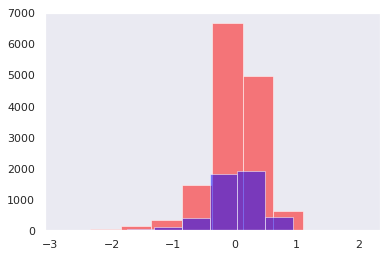

In [221]:
plt.hist(train_residuals, color="red", label="training residuals", alpha=0.5)
plt.hist(test_residuals, color="blue", label="test residuals", alpha=0.5)
plt.legend
plt.show()

Observations: Residuals are a bit negatively skewed, but with the normalized data the mean is around zero with most of the data falling between 2 standard deviations. Some residuals can be seen below -2 standard deviations. The MSE and RMSE between the training and test sets are also very similar, showing that the model was a good predictor for the error of the test set.

### Model Validation

In [222]:
cv_10_results = cross_val_score(linreg, X, y, cv=10, scoring="neg_mean_squared_error")
cv_10_results

array([-0.18037708, -0.18664472, -0.18139133, -0.19245411, -0.17403803,
       -0.17881544, -0.16765107, -0.2024603 , -0.19182294, -0.17558258])

10-fold cross-validation mean squared errors (MSE) are similar to the MSE I got above with just one train_test_split.

### Error Visualization

In [207]:
# for x in feature_cols:
    # fig = plt.figure(figsize=(15,8))
    # fig = sm.graphics.plot_regress_exog(model, x, fig=fig)
    # plt.show()

In [208]:
# above code did not include zipcode variables for some reason 
# fig = plt.figure(figsize=(15,8))
# fig = sm.graphics.plot_regress_exog(model, 'zipcode_98040', fig=fig)
# plt.show()

### Residual Visual

/anaconda3/envs/learn-env/lib/python3.6/site-packages/matplotlib/figure.py:448: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


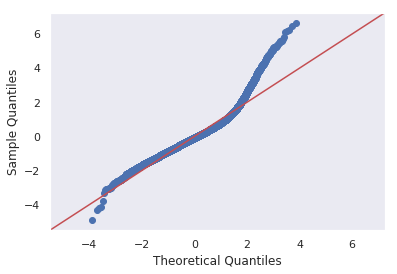

In [223]:
residuals = model.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
fig.show()

The "heavy-tailed" qqplot above indicates that the distribution of my residuals is heavily weighted in the tails - that the model is more accurate when dealing with data around the mean and within 2 standard deviations of the mean, but that the accuracy decreases in the tails. Although I standardized my data using z-scores and dropped outliers, this plot shows that there are still outliers affecting my distribution. 

## Question 3: How will I interpret, use, and communicate the findings from my model? 

## Interpret

* Draw conclusions from the data that answer initial questions or that raise new questions
* Evaluate meaning of results from a technical perspective
* Evaluate meaning of results for non-technical stakeholders
* Present and communicate results based on audience 

# Stuff that Didn't Work

### First Look into Z-Scores
My first attempt at normalizing the data was to look at the distribution of the z-scores of 'prices' and 'sqft_living.' 

In [143]:
# z_score function to normalize data
# do I need a docstring for this? seems pretty self-explanatory
def z_score(x, mean, std):
    return (x - mean) / std 

In [144]:
z_scores = []
price_array = np.array([df.price])
for x in price_array:
    z = z_score(x, price_array.mean(), price_array.std())
    rounded_z = np.round(z, decimals=2)
    z_scores.append(rounded_z)
z_scores

[array([-0.87, -0.01, -0.98, ..., -0.37, -0.38, -0.58])]

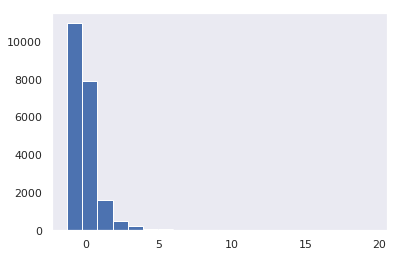

In [145]:
plt.hist(z_scores, bins=20);

In [146]:
sqft_living_z_scores = []
sq_living_array = np.array([df.sqft_living])
for x in sq_living_array:
    z = z_score(x, sq_living_array.mean(), sq_living_array.std())
    rounded_z = np.round(z, decimals=2)
    sqft_living_z_scores.append(rounded_z)
sqft_living_z_scores

[array([-0.98,  0.54, -1.43, ..., -1.15, -0.52, -1.15])]

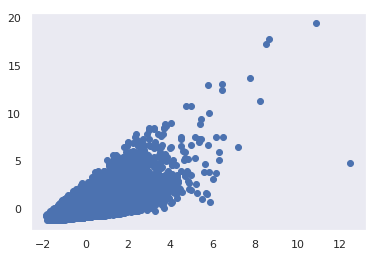

In [147]:
plt.scatter(sqft_living_z_scores, z_scores)

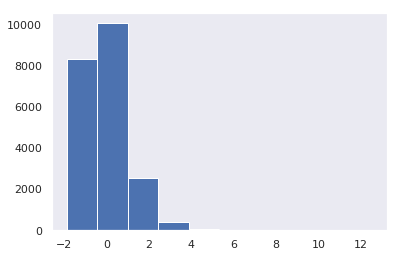

In [148]:
plt.hist(sqft_living_z_scores);

/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


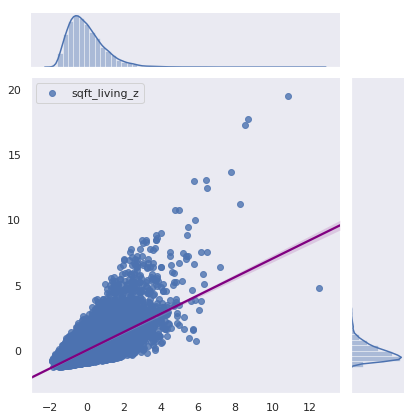

In [149]:
sns.jointplot(x=sqft_living_z_scores, y=z_scores, data=df, kind='reg', label='sqft_living_z', joint_kws={'line_kws':{'color':'purple'}})
plt.legend()
plt.show()

In [150]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,yr_built,lat,long,sqft_living15,sqft_lot15
count,2.142700e+04,21427.000000,21427.000000,21427.000000,2.142700e+04,21427.000000,21427.000000,21427.000000,21427.000000,21427.000000,21427.000000,21427.000000,21427.000000,21427.000000,21427.000000
mean,5.398495e+05,3.369814,2.114505,2078.575349,1.510892e+04,1.495426,3.408177,7.657488,1790.591917,287.983432,1971.064078,47.559938,-122.213670,1986.831521,12743.618239
std,3.674187e+05,0.902500,0.768915,917.738233,4.149498e+04,0.539880,0.649555,1.174325,828.629548,440.821343,29.349442,0.138688,0.140812,685.981140,27154.900920
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.210000e+05,3.000000,1.750000,1420.000000,5.043000e+03,1.000000,3.000000,7.000000,1200.000000,0.000000,1952.000000,47.470500,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.620000e+03,1.500000,3.000000,7.000000,1560.000000,0.000000,1975.000000,47.571700,-122.229000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.067200e+04,2.000000,4.000000,8.000000,2220.000000,550.000000,1997.000000,47.678000,-122.125000,2360.000000,10080.000000
max,7.700000e+06,11.000000,8.000000,13540.000000,1.651359e+06,3.500000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,47.777600,-121.315000,6210.000000,871200.000000


#### Conclusions
Simply converting values into z-scores will not be enough to normalize my data. 

In [151]:
# def z_score(x, mean, std):
    # return (x - mean) / std 

In [152]:
z_scores = []
price_array = np.array([df.price])
for x in price_array:
    z = z_score(x, price_array.mean(), price_array.std())
    rounded_z = np.round(z, decimals=2)
    z_scores.append(rounded_z)
z_scores

[array([-0.87, -0.01, -0.98, ..., -0.37, -0.38, -0.58])]

In [153]:
# function for converting an entire column's values into z-scores
def z_scored_column(column):
    z_scores = []
    col_array = np.array([column])
    for x in col_array:
        z = z_score(x, col_array.mean(), col_array.std())
        rounded_z = np.round(z, decimals=5)
        z_scores.append(rounded_z)
    return z_scores

In [154]:
# z_prices = z_scored_column(non_mansion_df.price)
# z_lats = z_scored_column(non_mansion_df.lat)
# z_bathrooms = z_scored_column(non_mansion_df.bathrooms)
# z_sqft_living = z_scored_column(non_mansion_df.sqft_living)
# z_grades = z_scored_column(non_mansion_df.grade)

In [155]:
# X = z_lats, z_bathrooms, z_sqft_living, z_grades
# y = z_prices

In [156]:
# X_train, X_test, y_train, y_test = train_test_split(X,y)

# linreg = LinearRegression()
# linreg.fit(X_train, y_train)

# yhat_train = linreg.predict(X_train)
# yhat_test = linreg.predict(X_test)

# train_residuals = yhat_train - y_train
# test_residuals = yhat_test - y_test

# train_mse = metrics.mean_squared_error(y_train, yhat_train)
# test_mse = metrics.mean_squared_error(y_test, yhat_test)

# print(train_mse, test_mse)

Trying to convert each individual column to its z-scores was throwing errors, so I found a more efficient way of creating a new dataframe with the z-scores of each numeric column. 

In [157]:
# make a new dataframe containing z_scores
num_cols = non_mansion_df.select_dtypes(include=[np.number]).columns
z_df = non_mansion_df[num_cols].apply(zscore)

In [158]:
z_df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,yr_built,lat,long,sqft_living15,sqft_lot15
0,-0.987603,-0.386783,-1.519406,-1.044985,-0.287741,-0.898673,-0.633201,-0.540933,-0.749848,-0.658411,-0.532783,-0.346674,-0.294041,-0.971917,-0.269954
1,0.086287,-0.386783,0.265823,0.714048,-0.225799,0.961838,-0.633201,-0.540933,0.596728,0.301136,-0.669354,1.159708,-0.736608,-0.409444,-0.183290
2,-1.129951,-1.551612,-1.519406,-1.563836,-0.118490,-0.898673,-0.633201,-1.461525,-1.307521,-0.658411,-1.283923,1.281052,-0.122725,1.245832,-0.164859
3,0.310509,0.778047,1.336960,-0.057902,-0.313032,-0.898673,2.437558,-0.540933,-0.926671,1.524558,-0.191355,-0.277745,-1.264833,-0.939775,-0.298275
4,-0.008838,-0.386783,-0.091223,-0.412239,-0.193194,-0.898673,-0.633201,0.379658,-0.069759,-0.658411,0.559785,0.411543,1.219252,-0.232667,-0.189216


In [159]:
z_df.shape

(20795, 15)

In [160]:
feature_cols = ['bathrooms', 'sqft_living', 'grade', 'lat']
X = z_df[feature_cols]
y = z_df['price']

In [161]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

linreg = LinearRegression()
linreg.fit(X_train, y_train)

yhat_train = linreg.predict(X_train)
yhat_test = linreg.predict(X_test)

train_residuals = yhat_train - y_train
test_residuals = yhat_test - y_test

train_mse = metrics.mean_squared_error(y_train, yhat_train)
test_mse = metrics.mean_squared_error(y_test, yhat_test)

print(train_mse, test_mse)

0.42863694142697134 0.4234225466777366


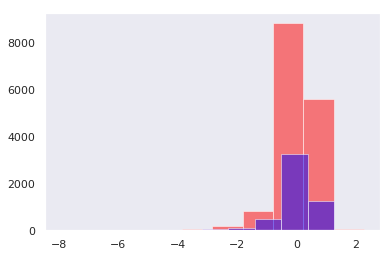

In [162]:
plt.hist(train_residuals, color="red", label="training residuals", alpha=0.5)
plt.hist(test_residuals, color="blue", label="test residuals", alpha=0.5)
plt.legend
plt.show()
# Negatively skewed but within 3 standard deviations from the mean

In [163]:
# experimental code
r2_train = r2_score(y_train, yhat_train)
r2_test = r2_score(y_test, yhat_test)
print(r2_train, r2_test)

0.5737520783111609 0.5693348176157844


In [164]:
# using z_df with statsmodel 
f = 'price~bathrooms + sqft_living + grade + lat'
model = ols(formula=f, data=z_df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.573
Model:                            OLS   Adj. R-squared:                  0.573
Method:                 Least Squares   F-statistic:                     6966.
Date:                Sat, 27 Oct 2018   Prob (F-statistic):               0.00
Time:                        08:22:25   Log-Likelihood:                -20667.
No. Observations:               20795   AIC:                         4.134e+04
Df Residuals:                   20790   BIC:                         4.138e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    1.266e-14      0.005   2.79e-12      1.000      -0.009       0.009
bathrooms      -0.0677      0.007    -10.088      0.000      -0.081      -0.055
sqft_living     0.4342      0.008     57.134      0.000       0.419       0.449
grade           0.3340      0.007     48.636      0.000       0.321       0.348
lat             0.3054      0.005     66.716      0.000       0.296       0.314
==============================================================================
Omnibus:                    12990.947   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           251811.253
Skew:                           2.675   Prob(JB):                         0.00
Kurtosis:                      19.187   Cond. No.                         3.14
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [165]:
model.pvalues

Intercept      1.000000e+00
bathrooms      7.050006e-24
sqft_living    0.000000e+00
grade          0.000000e+00
lat            0.000000e+00
dtype: float64

In [166]:
f = 'price~bedrooms + sqft_lot + floors + condition + sqft_above + sqft_living15'
model = ols(formula=f, data=z_df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.377
Model:                            OLS   Adj. R-squared:                  0.377
Method:                 Least Squares   F-statistic:                     2099.
Date:                Sat, 27 Oct 2018   Prob (F-statistic):               0.00
Time:                        08:22:25   Log-Likelihood:                -24582.
No. Observations:               20795   AIC:                         4.918e+04
Df Residuals:                   20788   BIC:                         4.923e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -2.429e-17      0.005  -4.44e-15      1.000      -0.011       0.011
bedrooms         -0.0038      0.006     -0.595      0.552      -0.016       0.009
sqft_lot         -0.0481      0.006     -8.462      0.000      -0.059      -0.037
floors            0.0367      0.007      5.347      0.000       0.023       0.050
condition         0.1465      0.006     25.671      0.000       0.135       0.158
sqft_above        0.2878      0.010     29.616      0.000       0.269       0.307
sqft_living15     0.3715      0.008     46.469      0.000       0.356       0.387
==============================================================================
Omnibus:                    10478.040   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           121464.860
Skew:                           2.152   Prob(JB):                         0.00
Kurtosis:                      14.030   Cond. No.                         3.41
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Observations from above model: interesting that bedrooms p-value is so much larger than the one for bathrooms so will not include bedrooms in future models. 

In [167]:
print(model.pvalues)

Intercept         1.000000e+00
bedrooms          5.520261e-01
sqft_lot          2.790146e-17
floors            9.029584e-08
condition        4.180469e-143
sqft_above       7.722935e-189
sqft_living15     0.000000e+00
dtype: float64


In [168]:
f = 'price~bathrooms + lat + sqft_above + grade'
model = ols(formula=f, data=z_df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.522
Model:                            OLS   Adj. R-squared:                  0.522
Method:                 Least Squares   F-statistic:                     5667.
Date:                Sat, 27 Oct 2018   Prob (F-statistic):               0.00
Time:                        08:22:25   Log-Likelihood:                -21841.
No. Observations:               20795   AIC:                         4.369e+04
Df Residuals:                   20790   BIC:                         4.373e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.298e-14      0.005   2.71e-12      1.000      -0.009       0.009
bathrooms      0.0596      0.007      9.029      0.000       0.047       0.073
lat            0.3157      0.005     64.699      0.000       0.306       0.325
sqft_above     0.1964      0.007     26.379      0.000       0.182       0.211
grade          0.4275      0.007     57.435      0.000       0.413       0.442
==============================================================================
Omnibus:                    13172.817   Durbin-Watson:                   1.962
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           246795.919
Skew:                           2.742   Prob(JB):                         0.00
Kurtosis:                      18.961   Cond. No.                         2.96
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [169]:
model.pvalues

Intercept      1.000000e+00
bathrooms      1.871445e-19
lat            0.000000e+00
sqft_above    7.146590e-151
grade          0.000000e+00
dtype: float64

In [170]:
feature_cols = ['bathrooms', 'sqft_above', 'grade', 'lat']
X = z_df[feature_cols]
y = z_df['price']

In [171]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

linreg = LinearRegression()
linreg.fit(X_train, y_train)

yhat_train = linreg.predict(X_train)
yhat_test = linreg.predict(X_test)

train_residuals = yhat_train - y_train
test_residuals = yhat_test - y_test

train_mse = metrics.mean_squared_error(y_train, yhat_train)
test_mse = metrics.mean_squared_error(y_test, yhat_test)

print(train_mse, test_mse)

0.4735244358433164 0.49311797607318847


In [172]:
r2_train = r2_score(y_train, yhat_train)
r2_test = r2_score(y_test, yhat_test)
print(r2_train, r2_test)

0.5244300817765115 0.5130753936615872


In [173]:
cv_10_results = cross_val_score(linreg, X, y, cv=10, scoring="neg_mean_squared_error")
cv_10_results

array([-0.47449304, -0.44118316, -0.45193438, -0.50766539, -0.40155452,
       -0.47771995, -0.52673766, -0.52528829, -0.53443452, -0.46035313])

In [174]:
f = 'price~bathrooms + lat + sqft_above + grade + sqft_living'
model = ols(formula=f, data=z_df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.575
Model:                            OLS   Adj. R-squared:                  0.575
Method:                 Least Squares   F-statistic:                     5630.
Date:                Sat, 27 Oct 2018   Prob (F-statistic):               0.00
Time:                        08:22:26   Log-Likelihood:                -20605.
No. Observations:               20795   AIC:                         4.122e+04
Df Residuals:                   20789   BIC:                         4.127e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    1.238e-14      0.005   2.74e-12      1.000      -0.009       0.009
bathrooms      -0.0674      0.007    -10.064      0.000      -0.081      -0.054
lat             0.2981      0.005     64.646      0.000       0.289       0.307
sqft_above     -0.1016      0.009    -11.147      0.000      -0.119      -0.084
grade           0.3569      0.007     49.928      0.000       0.343       0.371
sqft_living     0.5043      0.010     51.227      0.000       0.485       0.524
==============================================================================
Omnibus:                    12997.677   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           255390.567
Skew:                           2.672   Prob(JB):                         0.00
Kurtosis:                      19.316   Cond. No.                         4.84
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [175]:
# check for correlation between sqft_living and sqft_above
f = 'sqft_living~sqft_above'
model = ols(formula=f, data=z_df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            sqft_living   R-squared:                       0.728
Model:                            OLS   Adj. R-squared:                  0.728
Method:                 Least Squares   F-statistic:                 5.556e+04
Date:                Sat, 27 Oct 2018   Prob (F-statistic):               0.00
Time:                        08:22:26   Log-Likelihood:                -15982.
No. Observations:               20795   AIC:                         3.197e+04
Df Residuals:                   20793   BIC:                         3.198e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.318e-16      0.004  -3.64e-14      1.000      -0.007       0.007
sqft_above     0.8530      0.004    235.720      0.000       0.846       0.860
==============================================================================
Omnibus:                     4888.279   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9422.100
Skew:                           1.460   Prob(JB):                         0.00
Kurtosis:                       4.531   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [176]:
f = 'price~bathrooms + lat + sqft_above + grade + sqft_living'
model = ols(formula=f, data=z_df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.575
Model:                            OLS   Adj. R-squared:                  0.575
Method:                 Least Squares   F-statistic:                     5630.
Date:                Sat, 27 Oct 2018   Prob (F-statistic):               0.00
Time:                        08:22:26   Log-Likelihood:                -20605.
No. Observations:               20795   AIC:                         4.122e+04
Df Residuals:                   20789   BIC:                         4.127e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    1.238e-14      0.005   2.74e-12      1.000      -0.009       0.009
bathrooms      -0.0674      0.007    -10.064      0.000      -0.081      -0.054
lat             0.2981      0.005     64.646      0.000       0.289       0.307
sqft_above     -0.1016      0.009    -11.147      0.000      -0.119      -0.084
grade           0.3569      0.007     49.928      0.000       0.343       0.371
sqft_living     0.5043      0.010     51.227      0.000       0.485       0.524
==============================================================================
Omnibus:                    12997.677   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           255390.567
Skew:                           2.672   Prob(JB):                         0.00
Kurtosis:                      19.316   Cond. No.                         4.84
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [177]:
feature_cols = ['bathrooms', 'sqft_above', 'grade', 'lat', 'sqft_living']
X = z_df[feature_cols]
y = z_df['price']

In [178]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

linreg = LinearRegression()
linreg.fit(X_train, y_train)

yhat_train = linreg.predict(X_train)
yhat_test = linreg.predict(X_test)

train_residuals = yhat_train - y_train
test_residuals = yhat_test - y_test

train_mse = metrics.mean_squared_error(y_train, yhat_train)
test_mse = metrics.mean_squared_error(y_test, yhat_test)

print(train_mse, test_mse)

0.4173030776629377 0.4474528804183128


In [179]:
cv_10_results = cross_val_score(linreg, X, y, cv=10, scoring="neg_mean_squared_error")
cv_10_results

array([-0.42255103, -0.40536952, -0.41650275, -0.46310978, -0.35897497,
       -0.41963692, -0.46308087, -0.47808982, -0.45668606, -0.37207449])

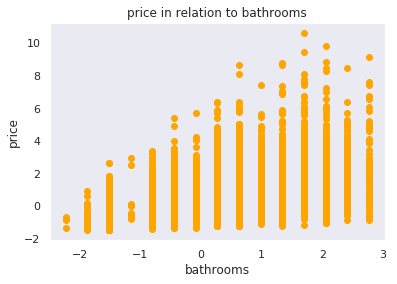

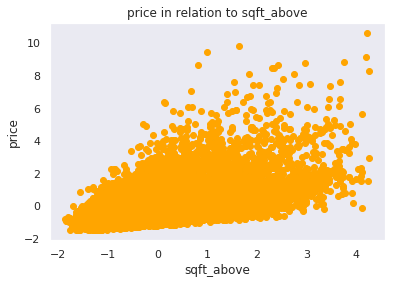

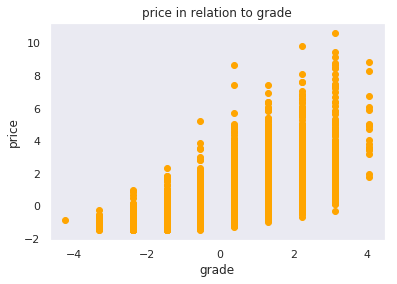

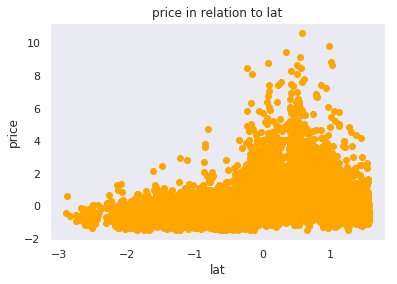

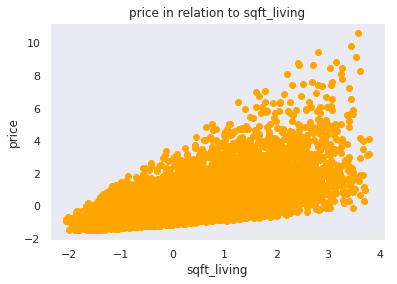

In [180]:
for x in feature_cols:
    plt.scatter(z_df[x], y, color='orange')
    plt.title(f'price in relation to {x}')
    plt.xlabel(f'{x}')
    plt.ylabel('price')
    plt.legend
    plt.show()

In [181]:
# sns.lmplot(x="sqft_living", y="price", data=z_df);

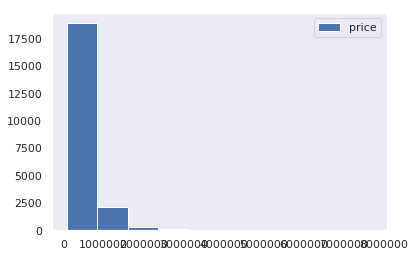

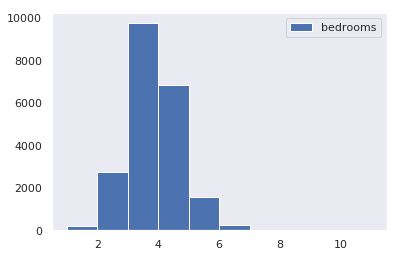

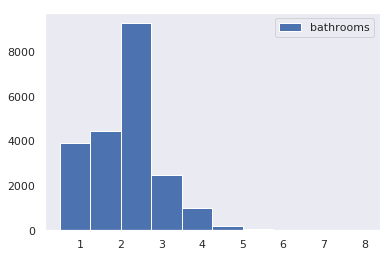

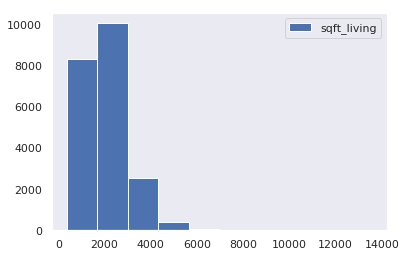

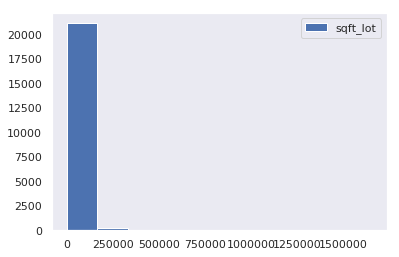

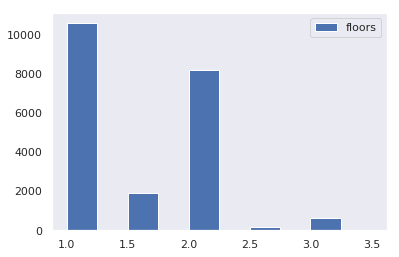

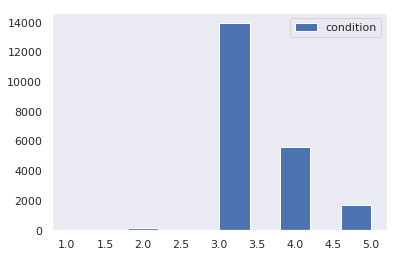

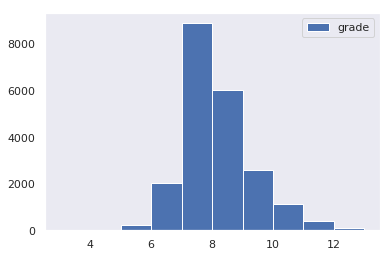

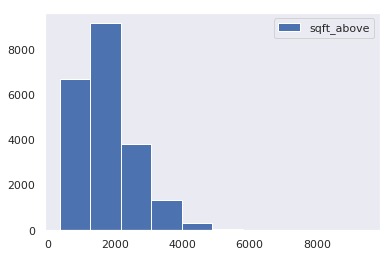

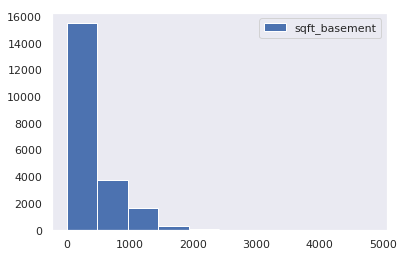

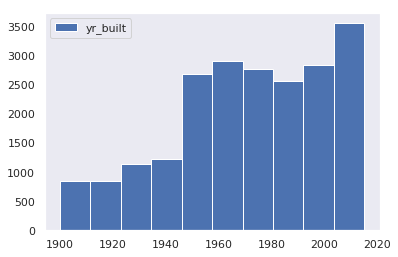

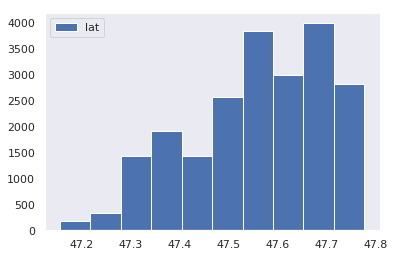

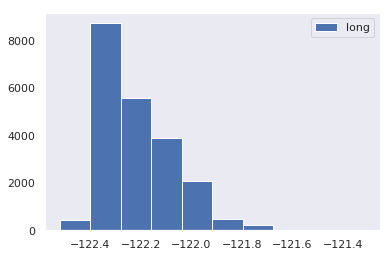

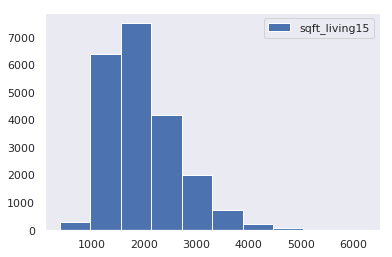

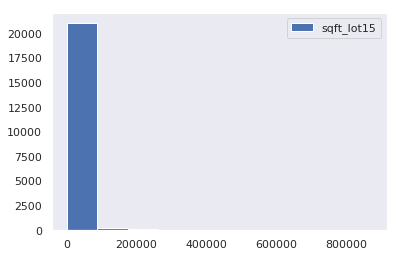

In [182]:
# Check distribution of z_scores
cols = z_df.columns
for col in cols:
    plt.hist(df[col], label=col)
    plt.legend()
    plt.show();

I still have very few variables that are normally distributed, so there could still be some outliers that need to be dropped, and I may not want all of my variables (i.e. bedrooms and grade) to be z-scores. 

In [183]:
z_df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,yr_built,lat,long,sqft_living15,sqft_lot15
count,2.079500e+04,2.079500e+04,2.079500e+04,2.079500e+04,2.079500e+04,2.079500e+04,2.079500e+04,2.079500e+04,2.079500e+04,2.079500e+04,2.079500e+04,2.079500e+04,2.079500e+04,2.079500e+04,2.079500e+04
mean,-3.553568e-17,1.892958e-16,2.952195e-16,-1.284751e-16,-3.280217e-17,-1.093406e-16,3.280217e-16,1.858789e-16,9.840650e-17,1.913460e-17,1.290218e-15,-4.104952e-14,1.286070e-13,-8.063866e-17,-8.200541e-18
std,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00
min,-1.476477e+00,-2.716442e+00,-2.233497e+00,-2.070032e+00,-4.873413e-01,-8.986730e-01,-3.703959e+00,-4.223299e+00,-1.851592e+00,-6.584113e-01,-2.410634e+00,-2.897758e+00,-2.135691e+00,-2.484164e+00,-4.877674e-01
25%,-6.577245e-01,-3.867828e-01,-8.053144e-01,-7.539217e-01,-3.130319e-01,-8.986730e-01,-6.332009e-01,-5.409333e-01,-7.498481e-01,-6.584113e-01,-6.693537e-01,-6.546995e-01,-8.151280e-01,-7.469277e-01,-2.953341e-01
50%,-2.296633e-01,-3.867828e-01,2.658226e-01,-1.591410e-01,-2.147494e-01,-8.986730e-01,-6.332009e-01,-5.409333e-01,-2.601841e-01,-6.584113e-01,1.159293e-01,8.341340e-02,-1.298630e-01,-2.005257e-01,-1.867323e-01
75%,3.818528e-01,7.780468e-01,6.228683e-01,6.083794e-01,-1.044636e-01,9.618382e-01,9.021783e-01,3.796582e-01,5.695244e-01,6.129886e-01,8.670697e-01,8.563497e-01,6.267838e-01,6.030066e-01,-8.425229e-02
max,1.062475e+01,3.107706e+00,2.765142e+00,3.789191e+00,1.100043e+01,2.822349e+00,2.437558e+00,4.062024e+00,4.255607e+00,4.978928e+00,1.515782e+00,1.566101e+00,6.430122e+00,3.286804e+00,1.842559e+01


## Explore

* Understand the data through visualization, inspection, and descriptive statistics
* Explore relationships with visualization
* Understand why certain values were collected and included in dataset
* Genderate questions that can be answered from the data

In [184]:
# non_mansion_df = df.loc[df['sqft_living'] < 6000]

In [185]:
# non_mansion_df.describe()

In [186]:
# f = 'price~sqft_living'
# model = ols(formula=f, data=non_mansion_df).fit()

In [187]:
# model.summary()

In [188]:
# model.pvalues[2]

In [189]:
# df.info()

In [190]:
# explore distributions of column values
# columns = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'sqft_basement', 'condition', 'grade', 'sqft_above', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']
# for col in columns:
    # df.hist(column=col);

In [191]:
# Normalized ugly histograms with kde plots with original values
# columns = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_basement', 'sqft_lot', 'floors', 'condition', 'grade', 'sqft_above', 'yr_built', 'yr_renovated', 'lat', 'long', 'sqft_living15', 'sqft_lot15']
# for col in columns:
    # df[col].plot.hist(density=True)
    # df[col].plot.kde(label=col)
    # plt.legend()
    # plt.show()

In [192]:
# Build joint plots to examine relationship between predictors and target variable
# columns = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'condition', 'sqft_basement', 'grade', 'sqft_above', 'yr_built', 'yr_renovated', 'lat', 'long', 'sqft_living15', 'sqft_lot15']
# for col in columns:
    # sns.jointplot(x=col, y='price', data=non_mansion_df, kind='reg', label=col, joint_kws={'line_kws':{'color':'purple'}})
    # plt.legend()
    # plt.show()

In [193]:
# Joint plots for selected non_mansion z_scores
# for col in feature_cols:
  #  sns.jointplot(col, 'price', data=z_df, kind="reg", joint_kws={'line_kws':{'color':'orange'}})

### Initial Observations
The joint plots with the regression lines show possible relationships between the predictor variables and target variable that warrant further investigation. Positive correlations that are observable now (before any feature engineering) include the predictor variables of bedrooms, bathrooms, sqft_living, sqft_lot, floors (slight), sqft_basement, grade, sqft_above, lat (slight), sqft_living15, and sqft_lot15. 

## Modeling - an Iterative Process

* Use questions to guide models
* Generate meaningful visualizations
* Normalize values as needed
* Use models to examine relationships between variables
* Assess model fit and robustness

In [194]:
# regression plots for grade
# fig = plt.figure(figsize=(12,8))
# fig = sm.graphics.plot_regress_exog(model, "grade", fig=fig)